In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp as e
from scipy.special import gamma


In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### SE KERNEL

C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


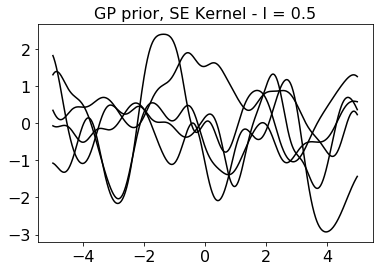

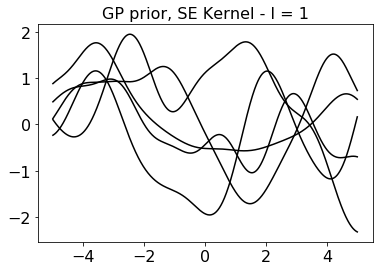

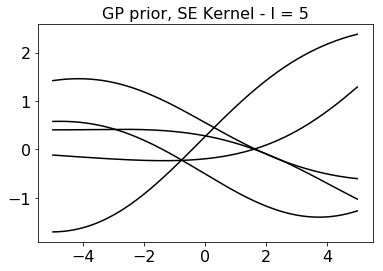

In [3]:
def SE_kernel(x1,x2,l):
    r = abs(x1-x2)
    return e(-r**2/(2*l**2))

def matern_kernel(x1,x2,l,mu):
    r = abs(x1-x2)
    if mu == 3/2:
        return (1+3**0.5*r/l)*e(-(3**0.5)*r/l)
    elif mu == 5/2:
        return (1+5**0.5*r/l+5*r**2/(3*l**2))*e(-(5**0.5)*r/l)        
    else:
        return SE_kernel(x1,x2,l)
 
x_s = np.linspace(-5,5,10/0.01)
mean=[0 for x in x_s]
l_array = [0.5,1,5]

for l in l_array:
    plt_vals=[]
    covariance = [[SE_kernel(x1,x2,l) for x1 in x_s] for x2 in x_s]
    for i in range(5):
        y_s = np.random.multivariate_normal(mean, covariance)
        plt_vals.extend([x_s, y_s, "k"])
    plt.plot(*plt_vals)
    plt.legend()
    plt.title('GP prior, SE Kernel - l = ' + str(l),wrap=True)
    plt.show()


    







C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


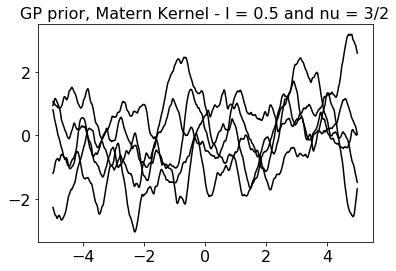

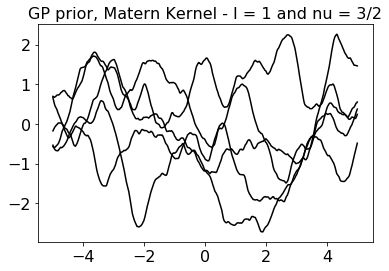

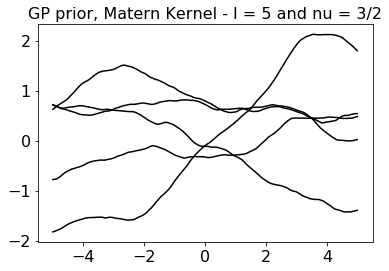

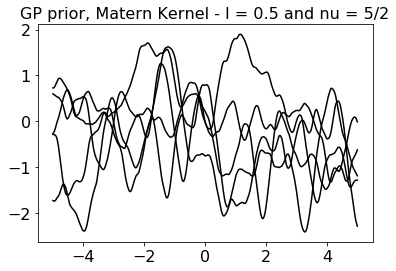

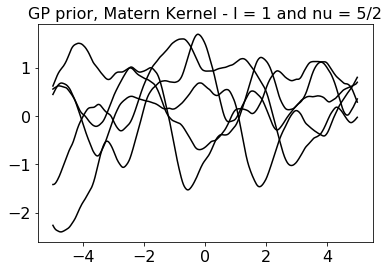

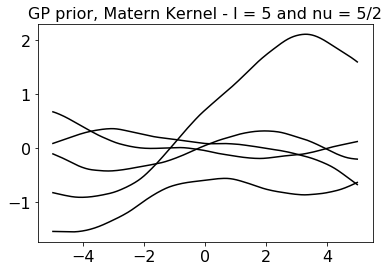

C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


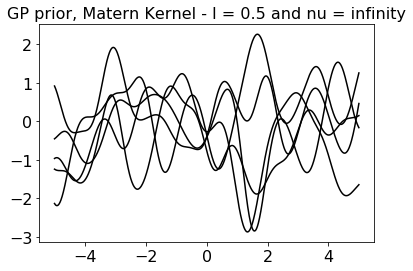

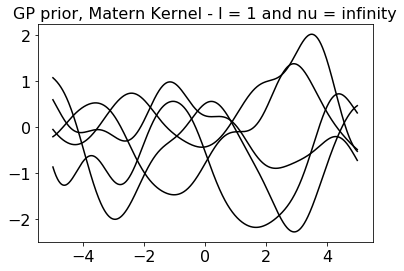

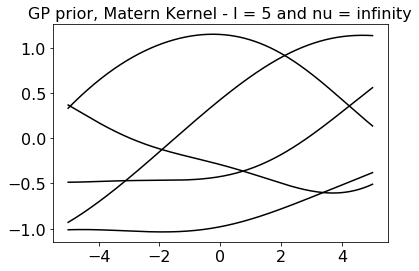

In [4]:
for mu in [3/2,5/2,4]:
    for l in l_array:
        plt_vals=[]
        covariance = [[matern_kernel(x1,x2,l,mu) for x1 in x_s] for x2 in x_s]
        for i in range(5):
            y_s = np.random.multivariate_normal(mean, covariance)
            plt_vals.extend([x_s, y_s, "k"])
        plt.plot(*plt_vals)
        plt.legend()
        mu_str_map = {3/2:'3/2',5/2:'5/2',4:'infinity'}
        plt.title('GP prior, Matern Kernel - l = ' +str(l) + ' and nu = ' + mu_str_map[mu] )
        
        plt.show()

    

C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: covariance is not positive-semidefinite.


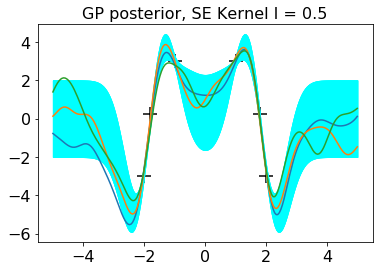

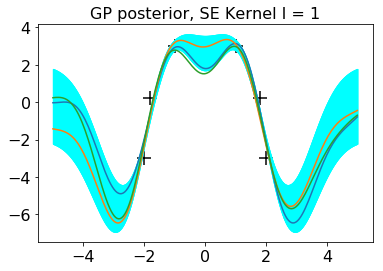

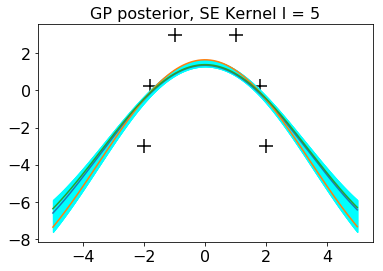

In [5]:
X_train =[ -2,-1.8,-1,1,1.8,2]
def f(x):
    return -x**4+3*x**2 + 1
Y_train = [f(x) for x in X_train]
X_train = np.array(X_train).reshape(len(X_train),1)

def cov_matrix(X,Y,l,kernel = 'SE',mu=1.5):
    if kernel == 'SE':
        cov_matrix = [[SE_kernel(x1,x2,l) for x2 in Y]for x1 in X]
    else:
        cov_matrix = [[matern_kernel(x1,x2,l,mu) for x2 in Y]for x1 in X]
    return cov_matrix

X_test = np.linspace(-5,5,10/0.05)
for l in [0.5,1,5]:
    K = np.array(cov_matrix(X_train,X_train,l=l))
    K_s = np.array(cov_matrix(X_test,X_train,l=l))
    K_t = np.array(cov_matrix(X_test,X_test,l=l))
    noise_matrix = 0.02*np.eye(len(X_train))
    sig_inv = np.linalg.inv(K+noise_matrix)

    X_train = np.array(X_train).reshape(len(X_train),1)
    Y_train = np.array(Y_train).reshape(len(Y_train),1)

    mean = K_s.dot(sig_inv).dot(Y_train)
    var = K_t - K_s.dot(sig_inv).dot(np.transpose(K_s))
    sd = np.sqrt(np.diag(var))
    #import pdb; pdb.set_trace()
    plt.scatter(X_train,Y_train,marker = '+',s=200,c='black')
    n_samples = 3
    for _ in range(n_samples):
        f_post = np.random.multivariate_normal(mean.reshape(len(mean)), var)
        plt.plot(X_test,f_post)
        #import pdb; pdb.set_trace()
        mean_mod = mean.reshape(len(mean))
        plt.fill_between(X_test,mean_mod+2*sd,mean_mod-2*sd,color = 'cyan')
    plt.title('GP posterior, SE Kernel l = '+ str(l))
    plt.show()





C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


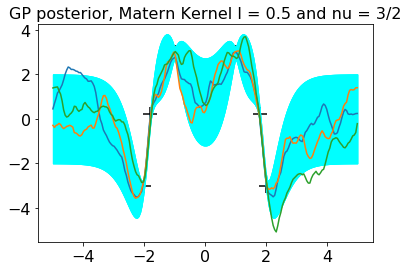

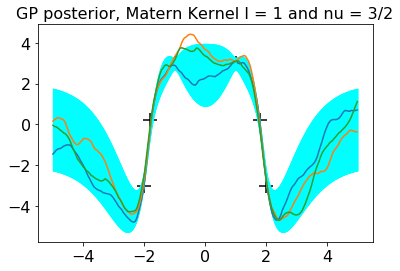

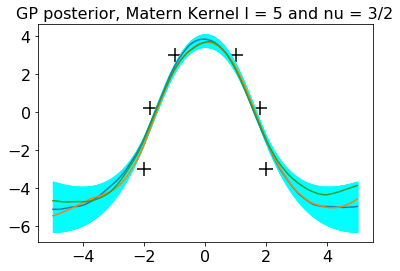

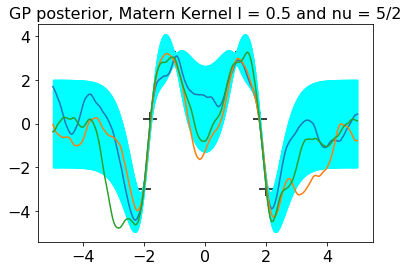

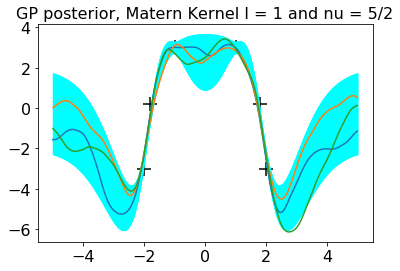

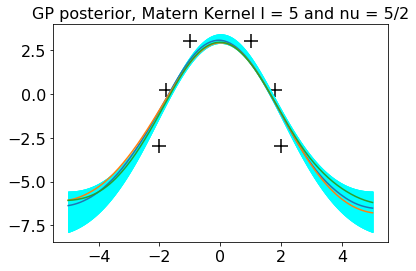

C:\Users\SrivatsanPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: covariance is not positive-semidefinite.


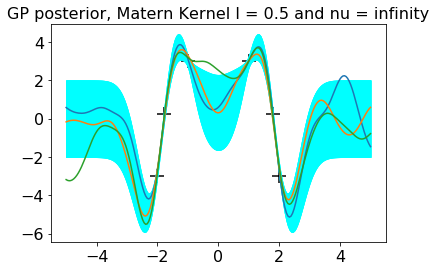

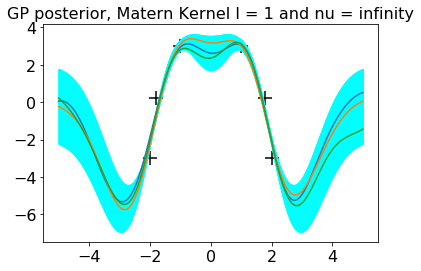

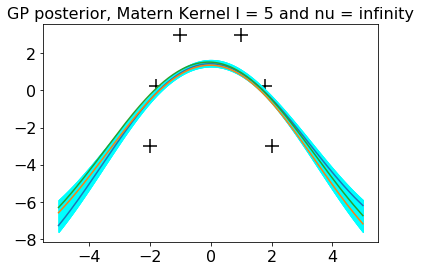

In [8]:
X_train =[ -2,-1.8,-1,1,1.8,2]
def f(x):
    return -x**4+3*x**2 + 1
Y_train = [f(x) for x in X_train]
X_train = np.array(X_train).reshape(len(X_train),1)

def cov_matrix(X,Y,l,kernel = 'SE',mu=1.5):
    if kernel == 'SE':
        cov_matrix = [[SE_kernel(x1,x2,l) for x2 in Y]for x1 in X]
    else:
        #import pdb; pdb.set_trace()
        cov_matrix = [[matern_kernel(x1,x2,l,mu) for x2 in Y]for x1 in X]
    return cov_matrix

X_test = np.linspace(-5,5,10/0.05)
for mu in [3/2,5/2,4]:
    for l in [0.5,1,5]:
        K = np.array(cov_matrix(X_train,X_train,l=l,mu=mu,kernel='matern')).reshape((len(X_train),len(X_train)))
        K_s = np.array(cov_matrix(X_test,X_train,l=l,mu=mu,kernel='matern')).reshape((len(X_test),len(X_train)))
        K_t = np.array(cov_matrix(X_test,X_test,l=l,mu=mu,kernel='matern')).reshape((len(X_test),len(X_test)))
        noise_matrix = 0.02*np.eye(len(X_train))
        sig_inv = np.linalg.inv(K+noise_matrix)

        X_train = np.array(X_train).reshape(len(X_train),1)
        Y_train = np.array(Y_train).reshape(len(Y_train),1)
        #import pdb; pdb.set_trace()
        mean = K_s.dot(sig_inv).dot(Y_train)
        var = K_t - K_s.dot(sig_inv).dot(np.transpose(K_s))
        sd = np.sqrt(np.diag(var))

        plt.scatter(X_train,Y_train,marker = '+',s=200,c='black')
        n_samples = 3
        for _ in range(n_samples):
            f_post = np.random.multivariate_normal(mean.reshape(len(mean)), var)
            plt.plot(X_test,f_post)        
            mean_mod = mean.reshape(len(mean))
            plt.fill_between(X_test,mean_mod+2*sd,mean_mod-2*sd,color = 'cyan')
        #jo6Oj2CrnB0dHR0dHoEXeHo6Ojo6PQIusLR0dHR0ekR%0AdIWjo6Ojo9MjRKxwhBAnCSHeEkIUCCFcQogaIcT3QojfCyF6B8hKv5dHCJEjhFgghMjs+lPoOEKI%0AbCHEI0KIgd1Q9izt/Gd1ddkR1p+r1f9GiOPLtOMrO1D2OO26JXe+pV2Ldt6vBaQZhBAvCyF8Qoif%0AHam2hUMIsVwIsTyMTLb2u13XM61qqvcCIcQmIYRDCJEnhHhACGGMIN91Ac+DxtcPPdHuSNDu5R/F%0A/hAhRH8hxMfab9gghCgTQqwQQpzdRp6vhBAvCCGMQoh7NPkSIUStEGKjEOJGIUREuiQiISHEr4FV%0AQBrwADAXuAJYCPwceClItpeBk4BZwD+A84ClQoioSOrsIbKBh4EuVzjARtT5b+yGsiOlFrhACBHn%0AnyiE6A/M1I53hHGo63bUKZxAhBAm4HXgKuA6KeXzR7hJxxxCiDOA94HvgbOAp1DPgT+3o5hLUf+H%0AxtfVXdxMnciIBcpQv9/ZwI2o58DnQoiLAoWFEPHAbOAjIAr4HbAduAm4AFgGPA/8NZLKTeEEhBCz%0AgceBp6SUdwUc/kII8RfUzRRIoZRyrfZ5pRCiBvg/1A37QSSNOxbRen1CSlkDrA0n384yPe3Muhg4%0ADbgY1QFo5GogFzgIhO2l9gRCCDPgkV24E1kr8y1UZ2e+lPKdLirXKqV0dkVZxwiPASullDdp35cJ%0AIWKBB4QQ/5RSFkdQxg9Syn3d10SdSJBSbkcpmSaEEJ8DOcD1tH42nw24gCWAGxggpazwO75UCJEE%0A3C6EeEhK2dBW/ZGMcH6L0oi/DXECdinlyxGUs157HxxKwG/4PUMI8ZEQok4IUS6EeDZwZCSE6C2E%0AeEUbEjqFEFuEEFcFyPQSQvyfEKJIkzkkhPhMCJGuTXUt00QX+w31Z/nlv0kIsVmbRigTQrwYOI2k%0A5fmTEOJeIUQO6scZHWxKTSjuEkLsFmpa8pAQ4hmtFxG2zAiucSANwHu07k1eDbwKtHq4CzVFulGo%0AKdMyIcTXQoipfsevAxZoX/f6Xbds7bhJCHGfEGKXds2LhBD/EELY/MponBa6RQjxNyFEEeAEEv3u%0AgalCiNe1dhQJIf7lX0Y4hBBW4ENgHnBpMGUjhBgrhPhECFGpTS+sEkJMD5B5Wahp5JOEEKuFEA3A%0A37RjuUKI14QQVwghdgoh7EKI9UKIU4LUNVMIsVSoaQi7EGKhEGJUpOdzpBBCZKFGtK8FHHoVMKM6%0AkN1Vd5oQ4r9CiD1CiHohxEEhxBtCiL4Bco9o98wQIcTn2nMjTwjxkAiY6hFCjBdCfKv9pwuFEA8C%0AIsL2NP7eV2v/4QatrCFCiBitreVCiMPaPW/yy9t4X2cHa3uHL1IXoHVkq4FgHdoLgIVSSoeU0hug%0AbBr5HrACqZFUFvKFGgE1AK+3JRcknwT+GJA2T0u/qY1812ky+cDfgdNRQz8X8LKfXAywByhFDe3O%0AQk2btCgf1cPfA/wEmIEaiT2HmkqLB27R8twOTNVe8Vrex1Aa/R9aO64HCoF1gDHgXAuBb1EjiTOB%0ADNRUogRm+cn+WUt7BjgDuAuo0/IawpXZzt8gF/WQmAV4gUwtfapW/iBgOarn6p/vRe13mK39Zm9p%0A13+0djwN+INWxiV+182qHX8LsAMPoaZebweqgPf96sj2O8ePtHrORw3ZG++BvcCjWhkPaufw+wjP%0A+33UdG8DcFYIuQlaO1dq53E28AlK8U30k3sZNeWQp53LLGCKX115qD/cJdp5bNLON9GvjHNQf+aP%0AtfM8H1gNVAJZfnLLgeVhzq/x2l0XRk6g/r/hXsYw5Zyp1XdSkGN24PEw+Rt/z2LtNzyE+g8mR/Bb%0ADgOeBi5DTQFfoV3rXMDmJ/eIVsc24NfaPfOUlna9n1yqds13ApejHqarUCN9GeG9lQ+s0fJeBhQB%0AW1D38d9RMwqN/49bglyH7IAyH4mwbkOEv6eI8PnQWF4v1H/VBZwaIGNBKaKrwpT1lnZdTWHrDVNQ%0AhnaR/hLkWIsTDTgmgT9px2yoB9JO7QbtE8HN+VxA+u+0m3Wo9v02Ah7mWvoSoATtT4R6mN/RRn2z%0AtHLmBvlTe4GHAtKnafIXBJxrERAVouxZ2vdk1MPs5QC5qzS588KV2Z4XzQpHaJ/v1dL/DazSPi8n%0AQOEElGHUfsPdqCnVwN9pcID8dC39moD0n2jp4/yur0Stb4kA2cayfx+Q/hmwJ8Lzltrrhjbklmr3%0ApCXgfHcCH/mlvayVdX6IuiqBJL+0SZr8fL+0fcDSgLzxqJmDJ/3SltN1Cqfx/gv3ClfffE1ueJBj%0ABcCLYfKfAfwepdBnozqQtcBW/JRGhPe0EcjS2nOhX/ojBCgXLX0rsMjv+59QD1Z/JR+j/Q4ywnur%0AAkjwS7tDq/uFANmNwLIg93V2gNwjEdbdeB+Ge7V5X/iV93e/PLXARUFkzkR1uhPbKOcMwAf8LpJ6%0AO2QWLYTopTWk6eU/fNS4XzvWgOoRuIGzpZRFEVQROP3xFkojn6h9n4FaI1oeIPcaqgc+Qvv+PfAb%0AIcQvhRCjhRARDZ1RvRQD8Lo2RWTSzm8d6seZESD/lQwzd4lSuhZaT028her9zuxAmWGR6q54Dbha%0ACGFB9exeCSUvhJgrlAVbudYuNzAU1dsMx5moP/R7AddtkXY88Lp9pLUvGJ8HfN8K9IugDQDfoR4i%0ADwtlINECoaZnZwLvAj6/dgpUpyWwnW6UwgvGGillZUA7aWyrEGIIajQZeC/Vo/4XgXV1FRuAyRG8%0Abu6m+gGQUi6UUj4spfxCSrlMSvlHVCdrFKoj0iZCiF8INa1dh7of87VDwe7HwHtmGy3vmZOAtVLK%0Ag37tswOfRn5GrJFSVvt936W9LwyQ24VSjl3FI0T2e0Z6Lk9q8ucCXwJvCCHmBchcAKyQUlYFK0AI%0AMQJ4E7U00SVGA+WAg9Z/9DKtsaCmtIKZmr4E/Ad1kxyUUpZH0iCNwyG+N87dJqOG5oEU+x0H9XB9%0AGLgHdYEPCSGeQ033+dqoP117D7XImRLwPVhbAmlsUwtZKaVHe7gHWnxFUmakvIIaJT6M6tG9HUxI%0ACDEB+AL157lRa4MXeAE1Ug1HOkqp2kMcb891C5wrdqLmiSNhL+q+XIZa1JwR0NFJRvWWH9RerRBC%0AGPzukVIppTeSdkopnVq/pvF6Nd5LL2qvQPKDpHUFdUAkpsehFH4jjco0KcixJFr/TpHwCeoeOZHg%0A1wQAIcTtwL+AJ4DfaG0xoIxxgt2Pwe4Zf7neKCUUSODzpi0qA7672kiPeM0xAvJRI8pwhLpPWyCl%0ALPAr7zOhzPH/jtax0jrn5xHCElGorSSLUcYGF8oIDZraVDjaw/Ab4DQhhEVK6WpMRzMCCKIVGzkk%0ApVwf4lg4MlCmd/7fQc35g7qxgvVwevkdR0pZAtwK3CqEGAZcixrel6KUYSgalePptL6R/I83Eu5P%0A29QmrY1N56b1dlNo/WeJpMyIkFLuEUKsA+4FPgjVY0GtF3lQw2u3XxuTUOsS4WjsoEwPcTxwdNtl%0A5xiIlHKzUOa8S4CvhRAzpZSND5Yq1DTAs4QY7QV0SDrTzsZ75T6tLYG4gqR1BTNpNoppixWo6bdQ%0ANN6rI1EjMkAZfgDRwI4OtS4yrkBNRf7ar94BnSjvEM3PEn+CpXU1Du3dEpAe2AkLxUuo51c4rqel%0ARWqkrAfu9Ps+BaWgPwoUFGo/5VKgBjhDKovciAhrFo2yyFmMGjIFmkV3F5cBX/t9vwL1gFinfV8B%0AXCqEmCalXOUnNx+1htPqTyCl3A3cL4T4OWo4D6oHBGqx2p/FWn39pJSLO3MifqxFPVyuQP1YjVyO%0A+h2Wd1E9ofgbcA3KYCEU0ageUtMDVggxBzXCzfGTC3XdvkJZMyZIKZdyhJFSfi+EOAs1YlsihJgt%0ApSyTUtqFEN8CY4GNYUa7nWU3au5/pJTysW6sJ5DGKbVwtLkXS0qZL4TYjJr+esHv0FWoqcYvO9C2%0AC1Aj7XVh5KJRDzV/ru9AfY2sQU2xZzVOqwkhYlDTSt1NnvY+CmXI1NjZPD3C/I/Q9n+3kZzwIi3R%0ALPlOAfb7JV8AbNBGQv6yaTR3nE6TUpa1p66wCkdKuVQIcS/wmBBiDKpHmIMaLg5FPUDtdG1v9Wwh%0AxOOouf8TUVNBr0gp92rHXwZ+CXwghPgdamj4E9Tay81SSq8QIgF1YV5Hzae6UdZBSTSvKexB9ehv%0AEEJUoB6ku6WU+4UQfwWe0UZGK1A9lCytjheklJH0HpuQUlYIIf4B3CeEsKOmrk4A/oiylAqcfw6K%0AECIXyJVSzmpn/R8Qfv/TV6hezstCiAWo3/dBmkeWjTQq9FuFEP+HurZbpJTLhRBvotZwnkCtpfhQ%0AC91nA7+VUu5pT7s7i5RytTYK/wJYJISYo43wfgV8AywUQryI6v2moqzXjFLKe7uofimEuBX4WFtD%0Aewc1JZ0BnAzkSymf6Iq6AuqtpXkrQme5HzXt8l/UnP141OL/U9JvD44Q4iGUxdMgKWWelrYQ1cHa%0Agfp/TQPuBjaj/ptt8RXwWyHE/ah7aQ7KGrCj/BNlmbpICPGI1p7foNaZu5vvUQ/0x7UHvFNrS0TT%0AxFLKXFTHpVNo552Mss4rRs243Ih6zs73E72AgPVmbe1zIer/fAOQKVp6j9kRdrQTiWWBtq47DfVn%0AKUT11GtQF/H3QO8AWUmAWXSEdVyn5Z2BMiGtQ001PUtrK7DeqL0AZagfbwt+5nuoH/K/qCmBOr/2%0Azg8o52bgAErxtLB8Q+1XWYtSqHUoC6Zn0EyM2zpXgptFC9Qocbd2DQ9p5xYf6fVDTQe+FcG1zAVe%0ACyOznNZm0bejOhQN2vWaSxDrKVQnoJDmEVG2lm5AdQY2o5R0tfb5b2jWPTRbWv20jXsg0ALuESK3%0AJGp13qiOQgOqV91o+n4CymijRLuHClDrC2f75XsZKGhnXRJ4JCDtJNT8eKV2XXK1uk/yk2l1nYOU%0A3Xjtrmvv/6szL+Ai7Xd0otYTHiLApJpma7Fsv7QnUf+bWu2e349aK0iIoM4o1NR3qZb/M2BA4PX1%0AqzfQWvZlVOfMP20CaruBQ7t/H0Q9wzp0bxHa0rXVfYOallyOepbkozo9Ed3XXfg7noeaPWq85/O0%0Ae36an8xw7ZxGhbj3Qr1mhatfaAUdFYjmTYVDpL4ruRVCiKEoZTVFSvndkW6Pjo7O8Yc2o3WjlHJI%0AV5ete4s+tpgJLNaVjY6OTnchpXysO5QN6ArnmEJK+byUMtJFRh0dHZ2jiqNqSk1HR0dH5/hFH+Ho%0A6Ojo6PQIkezDOWKkpqbK7OzsI90MHR0dnWOKDRs2lEkp0450OwLpUYUjhPgK5eztT1LKB8LJZ2dn%0As359V20l0NHR0flxIITICy/V8/TYlJoQ4krUzm4dHR0dnR8hPaJwNF9c/0RtdNLR0dHR+RHSUyOc%0AvwLbpJRv9lB9Ojo6OjpHGd2+hiNUuN1r0KfTdHR0dH7UdOsIR3NW+F/g71J5a9bR0dHR+ZHS3VNq%0A96Ac8P0p0gxCiJuEEOuFEOtLS0u7r2U6Ojo6Oj1KtykcIUQ/VJTJBwGrECJRCJGoHW78bgzMJ6X8%0An5RykpRyUlraUWdGrqOjo6PTQbpzhDMQFTPnNZRL9sYXqHgYlcDobqxfR+dHx97DtSzbVXKkm6Gj%0AE5TuNBr4AZgdJH0ZSgm9COghCHRC8gdgNapX8rcj3JZjgXeBhz7dgTO3gm/vn0vfaPORbpKOTgu6%0ATeFIFVVxeWC6EAIgT0rZ6piODqgIXWNRUe9AhX18CtiKCkGq0xIvMATIbXCTdaAc4ZOcsKWIZ6b2%0A55oj3TgdHT905506RxUuVLhBe5D0MaiHq05LZqBCtEbtLkH4JF6biZj1B7kWFUdYR+dooccVjpRS%0AROJHTefHyTBUrO9gOIHpPdiWY4HnUdOOANE7DuONtVI9ZwjWgmrMh2uZgYqrraNzNKCPcHSOGl5D%0ABY1vizWoQPQ6ilsbP3i8RO0upX5EOvbxfQGI2nEYHzDnSDVORycAXeHoHDX8LEK587u1FccOrwBu%0A7XPMpiIMTg/1o/vgi7PiTonGUlANwFpA39GmczSgKxydo4KnAUeEshsIP02UH4HM0cx+wq9X3db4%0AwesjYfk+nH0TcAxOAcCVmYi1oKpJdlY3tFFHp73oCkfnqODedspfFyTNC0wGBNAfiAYSOHYWzqtR%0Aa1gCGIwyIU1AGQQEsgWo1T5Hbz2Eubye6jmDQVmB4sxMwFTtwFDrBGAHyvBCR+dIoiscnSPOfqC+%0AnXk+DPjuBeKBwHB9NcApwOUda1qP8QqQCOwJSK9B7aDeGZB+Y+MHKUlYcQBXeiwNJ2Q0HXdlKqce%0A1sLmUc6t6OgcWXSFo3PE6cheETdqaq2Rk2lbab3D0evW4rfAtWFkxtFyiq3x3K15lVgO1VB7ygAw%0AiKbjrj7xSAGWg9VNaa92UXt1dDqKrnB0jjhrOphv5u7dzJo1i/8A30Ugvw01Wjia+CWReVFwAVOB%0AWbNmMeyxx5BaetyqXLxRZuzj+raQl1YT7vRYLH7rOE6U+w8dnSOFrnB0jihfQNPDs73Yhw6lbMqU%0Adk0V5aDWR44G7gb+1Q759UDxnDns/ZUKnGuscRC9vZi6yVlISys/uJrhQDXI5it8R+earKPTKXSF%0Ao3NEeaST+bf79fYjZT8wsZP1dpa/AP/oQL7dDz6INCsfadGbixA+Sd2J/YLKOvslYbS7MJU1+21Y%0A24E6dXS6Cl3h6BxRNnUmsxBNVlkA+Nwk7X6HmOLvw2bdCJzWmbo7wYvA/R3N7HfOMVsO4eybgCc1%0AJqioY0ASALbciqY0N8oaTkfnSKArHJ0jRjGh3di0l6iSHxj82eX0XfsH+i/5BVEl4VcrlgDzu6j+%0ASPkE+GkXlGMqr8d6sIr6sb1DynjSYvHGWLDmVLZIv68L6tfR6Qi6wtE5YrR3700oMjY8wcAvr8Ho%0ArKHglD/jjs6g/9e3Y6yvaLF+EYw38dtA2c18Tdd5SYjeUgSAfUyf0EJC4OyfhNVvhAPKYk9H50jQ%0AnfFwdHTa5NP2ZnB7iVubhzW/EmdWEvaJmcSUryJt2wIqB1/AoRPvxWeOwRmfzaAv5pO14HmcnpMp%0AvXI8nvTYkMU+C1iAJzpxLuH4Bjg1SLpwe7HmVgISZ78kpDWyv2T01kM4+iXiTYxqU84xIJnoHYcx%0A1jjwxtsAKG9Xy3V0ug5d4egcMSrCizRhrHGQ8dwazBX1eOKtxGwtJnbTfuL6/A1H4mAKT3oIDGYs%0ABVXYNgp8njgsYjuemgn0fmYlh345HU9K8LUOgH+iTI+f6exJBWExcHqQdOH0kP7Sd9jy1JRX3cRM%0Ayi8dG7Y8Y1UD1qIaKs8aHlbWmZ0MgDWngvqxzaOhLahwDzo6PYk+paZzRMiPRMgniV2bR9S2Q6S9%0AugFjnZPDN55I4f1zOXz9ZGLci7HUF1M08XdK2eRV0uu5NcR+dxCncQzGxP0U/3wKBpeX6G3FYat7%0AFpjX2RML4HlaKxvh9BCzoYCMF9dhza+k/KLR1E3MJGZTIcaq0B7gXvj4Vir/0o8Dz41nkCikfkRG%0ASNlGXH3i8dpMRAWEnX68A+eio9NZdIWjc0SI5IEXs6mQlI+2kf7aRiwFVZRdPg7HkDQAHMPSEVm7%0A8TRkkfhWHYkLd5H+yno8CTYK751D2czzMbprMJOLKyMO297I/CV/DgygawK93QDcFJBmKqmj99Mr%0ASX13M6aKBsouH0fdif2oOk3FMo3/5kDQsiweJ/O3vsfOtKGkOCu5JeYzPGmhpwmbMBpoGNWL6B2H%0Awd18Vks7eE46Op1BVzg6R4TPwxwXDjdJX+7CmZVI8U1TKblxCg0jezUdt1TnYnUcoHLkeQiPj/gV%0AB/BFmSm5bjK+WCt1vU9CIogtXEXD0FRsOZUIV2Q2cbmAjSDx0SOkAugLLAhIN9hd9Pr3KgwON4dv%0APJGC+0+lXvMQ4E2Mwj6+L7Hf52Ooc7Yqc0rBeqI8Dh6bdCt/Nk/hHM+3DKwIrpwCsY/pg8HpIWp3%0As9INP97T0el6dIWjc0Roc0pNSpI+34nB7qTi/JE4B6bgGJzaQiQhbxEAFRMuoPC3s8n/01kU3T2r%0AqdfvtSXSkDqK2KLVOIamIbw+bAeCL5en2stY9Mr53L72uSarNg8wG7VBtD37Vh4r2MCNOz/lsLe1%0AcovZUIDR4eHwDSeqkZqf7zOA6pkDER4fcatzW+WdlbsSH4K9a7/lk745PJCewj3f/jOiNjkGpeCN%0AsRCjWbaB8u6g78fR6Wl0haPT47hoe8oqblUucd8fpGbmoCavx4HE5y7Enj4ed0yv1htANey9TiS6%0AbBvOzCh8ZgO2PWWtC5KSBR/dwmkHlvOvr37L2+9e18KUeiPKi/Nw4LMQ7d0JnAkkOqq54Y3L+PDt%0Aq9j/r3FcuOOTFvXEfZePo38S7j4JQcvxpMfRMCKDuNW5CIe7xbHZu5ezyNwfg+1r3NbeLIyJojL/%0AM/rUFAUtqwVGA/WjehG1swQ8zVe+O63ydHSCoSscnR7nrSBpxop64pfvp9e/viX5sx3Uj8ig6vRh%0AQfMbG8qJqtxDSuwAxhf9EHKvjb3XZIT0EF25BeeAFKKCrOPcse455u1dyB1n/pWHZt3PZTs+Yv7W%0Ad1vJ7QbORcWqMQFWwKx9HwEsBO799gnS68v45ZmPUR6VxAfvXM3/Prkd4fNhzanAXGYP6YamkepZ%0AgzE6PMStax4DxuUd5qSi73k2JQafJZp957+Ba8A8Xo+P5ZKvI/NZ4BiUisHtxVJc25QWblpTR6er%0A0c2idXqc9/2/eH0kLN1LwrJ9CAnOrEQqzjmBuqn9W005NZJcpDyC/W/lvxm/9Ek29RrNztRhuI1m%0Abp73JE6z2m9Snz4eKYzEFK/HMegckr4sxVDrxBdnBWDcoc38bfFDfDL0LJ6ecjNCSs7d8yWPL3qQ%0AT4adRZ01Lmj9XlqP0LIrc7lz7X/4v7FX8q+pv+Dfk3/KH77+I/euepKy6BSeKDsfn81E/ejQngEA%0AXFmJNAxNI37FfmpP7IfwSU5//W0Mwk1edAOVQ67EG5XK3mmPMidvGesrvie9bCclqSe0Wa4zS42q%0ALAermkaNu9vMoaPT9egjHJ0eZ6Pf55T3tpD49T7s4zMpvGc2xbdOo3b6QKS5tffjRsbu/hCTlDw9%0A9zFumvckEsEp+Wu5dvObzNvzVZOczxxNQ+pIYoq/xzFA7Uex5ah1HJu7gbfeu4Gy6BRuOP9ZEAJp%0AMHD7WY/Tp66YO9Y9F/kJScnTX9yDx2Did3MeBMBjNHPf3Ed4buL13Lfyn1y4/RPqxvcN6tU5kMoz%0Ah2Gsd5P86XbSF3zHuIbdbLdakNKDPWOSqtJopuiUv1BvEExe+WjYMr2JUXhjLVj94uPURX6GOjpd%0Agq5wdHqcRgspY0U9MT8UUjMtm/LLxuJJjo4of2zJJrJ9Bl6ZdAMvTrqeiT//lgF3bqE4Jp0rt73X%0AQtaeMZnosm24M8z4LEZsB9R209vX/Zdh5fu49oL/UB6T0iS/LmsySwfM4KcbX0H4fBG154JdnzFv%0A70Ienn0fhQl+cWmE4Laz/872mMHcK97AMant0U0j7j4J1I3rQ+zGQkwV9QwaUM3ShHQA6tMnkKzJ%0A7RwwmwkyisNV2zA4w5gACIEzM7FFfBzQw07r9Cy6wtHpcRrtt+LW5oEQ1EyPPCzaoNLdFEgH3qQT%0AuFIIZmnpPoORd0ZeyDl7FhHvaH742nudiJAeYko34cxOxnqgnMSGSu5b+QSfDzmdpYNmt6rjxfHX%0AMKAqn9m534RtT1bVQZ777C42Z4ziX1N+3uq412Dkr74rGWgo5pqijyI+z8p5I6g4+wSKfj2LMQ17%0AWR0bjyNxMGZbYotgc47Bl+AQMHp9+Mg6rsxEzKV1LQwS3oi4RTo6nUdXODo9yjbtXbi8xH5/kPqR%0AGWH9gflz6bp/4TAY2DrsAp4AbvE79uboS7B5nVywq3k53N5rIj5TFHEFK3AMTMFSUse9y/5BgqOG%0A+099KGgdH54wj0pbAjdubDsoc7TLzidvXonV4+LySxbgMZpbyVjzKvmmcjirkifyyPLHiHFGNpHl%0Ai7VSO2MgVrOHwWV7yMGBPWMi44BBQOPE3OeTbmayw4Vl/0cY3G0F2VbrOEKCpbBZIX8YUWt0dLoG%0AXeHo9Cgvae+2fWUYG9zUndg/4rz9K/M4Ya8yTi7pP5s04AK/42szJ7MvaQD3ffsE0S4VdEwardT1%0AnkpcwTc4spPIFoe4c/1zvDr2Crb0Gh20Hoc5itdHX8ZFOz8l1lkbVAbgl2v/w7jDW7nikpfYnTY0%0AqEzsunx8VjO/mfcnetlLuHPtfyI+X4DRJTvYZzbhkR7qMyZynZY+SXuvjkpkeOJYGqSL9G2BW01b%0A0mgs4L+Os6FdrdHR6Ry6wtHpUZZr75aiGqQAZ7/g+2wamVC0ies2vcYvvnueZ7+4m90WMz5LAifH%0AKK8DRpSnZwCE4OZzn2Ro+T6e/fxu+lYXInw+ajNnYrEfYohzLb83v4xDWPjt3N+3We/boy7C5nVy%0A1t7FQY/b3A38ct1zfDl4LguHzA0qY6h3EbP1EPbxfVkz8CQ+HD6Pe1Y9Rao9yH6gEIw/tJlvom1I%0ABPZek5ti6TzmJ7N04k2caq8nbdtLGBtC+4L2xVhwp0RjOdi8jnM44pbo6HQeXeHo9Ch7tXfzoRo8%0AKTFtuuOfXLCBDf+bxYKPb+XfX9zNOXsXsSq5L/XJw/iTn9xIv89fD5zFY6fcxXWb36DgnyMo/vsQ%0A/r1OTY3Z2K8rAAAgAElEQVTd+cXNzDRs5W9J13E4rm3Hl6uzplASncqFu4Jv97zuh9fJsJfy2Cl3%0AhSwjZlMhwuOjVtt7c/+pDxHlaeDz1y+NWOmMK97Kotg46tPGQVRq01TaLD+ZJQNnc4XLDD4XKbva%0AXpVxZSZi9TMc6KoAeDo6kaArHJ0exa69Ww7V4Ood36bsH5b9kbKoZIbdtp7ev97N4Ns2UCKdOBMH%0AcaKf3E8C8j0w50HmXv0RvzjnHyweNJsJlfmkGeP4X78xzOvzFC83hA8u7TMY+Xj42ZyzZxEWT0vf%0AZmaPi3tWPcXavpP4pv+0kGVEby7C2Scedx91nrvShnHR5a8xumQHi1+5IGxwOIDM4k3sMxup6X8q%0AgwKONapMn8HIslFXMKO+gdTd7yC8rX2xNeLMSsRU7cBY42hKi8ytqY5O5+lWhSOEuEQI8ZEQ4qAQ%0AokEIsVsI8RchRPAddTrHPRLlmNNcUY+rd+jbYFreGs7Y/zV/PeVO9qQOoTiuF/m2GIxuO5bEwS1k%0Abw6sw2Bg6aDZPDf5p1x18QsMu2MjO4ddhL3+ECuzJ2GqqEe4wvuD/nD4ucS7apmT09Ja7eYNCxhQ%0Alc/Ds+8L6lIH1HSa9WAVDSe0HEl9Nuws7jzzL4w7vJWxxVvbrN/icXLYngtATb85BE7c+a9f/d/Y%0A+VxVXYPBWUVCzleEwuW3AbSR90IJ6+h0Md09wrkbtSn7PuAs4D/AL4DFQgh9dPUjI0d7b3Sv0tjz%0AD8Y9q57icEwaz07+WVOatUpNyE0NUDgROOnHnjEeg8+NIb4YIcFcEtoYoJGlA2dSYUvk3pX/JNpl%0A5/23fsJb717Hgyv+xrLs6SwaFCyGp8K2twwhoWFoWqtjHw2fhw/BuXtCKwaAscXb+CbKgjWqF+64%0ArFahDh7x+7w7bSgieQR9fQZSty1AeBwEw9U7AWkQLabV9FAFOj1Fdz/0z5VSXiylfE1KuVxK+SRw%0ABzCFltPQOj8CGj2UWYpqAPXwC0ZG7WHO3ruIBeN+QoOleTOorWo/AH9IDJxcgnBD5vq0cQCYxT71%0AXhxe4bhMVn59xp+YmbeKzf+ZxgW7PmfugeWk1pdz79xHQo5uAKL2lOKNMuPKam0UURKbznd9J3Lu%0A7i/brH9S/iq2WK1UZc0EWkfo7EXLP/BrY6/kvpJibNX76bv6YayVezDb1TZbg6uWxH0fk5jzPp5e%0APiwFzZZq29DR6Rm6VeFIKYNND3+vvfcNckznOOZb7d18qAZvtBlvvDWo3NVb3sIkvSwYf1WLdGvV%0APtxR6QyxtlZUI1ultMQblYIzPhtb3XZ8ZkMLJ5Zt8fK4n/Dp0DMZXJnDr8/4E31+vZvBd2ziu8xJ%0AoTP5JLY9pTiGpIb0B/fpsDM5sWgjvWpDR6bpc/BbPEJwuN/skE4Ph/h9fnvkRUxzuBkbN4LEnC8Y%0A8snFDPngHKJLNtF/yS1krnqAvmv/gDV1qZpS86k1pIIw10BHp6s4EtNaM7X3nUegbp0jyA7t3VJc%0AqwwGgo0QpOSGTa+xKmsKe1KHtDhkq9qHMWlw6zyo8ADhqE8fR3TpD7gzYjEX10TWaCH4yUXPc9rV%0AH/Lk1FtwmazkJA9oM4u5uBZTrTPodFojnw49C4Dzd4X22eyr2oXQ2h1qt9LP/D6Xxqbx1eC5/Dl3%0AKwdnPM7B6X/BE53GgK+uJ6b0BwpOfhR7xiRMxhyMDg+mcmXC0fZ2UR2drqNHvUULIfoCjwJLpJTr%0AQ8jchBaZt1+/tl25h8ILjENZRImAl0F7N2qfjdrLjLoYZu1lQUV9jAZiUFM2iUAykA70Q4UibvRr%0ApROexsgtpjI79WOD+xWbk7OCE8r2cON5T7c8IH1Yqw4wetilQfPdTMs1jWDY0yeQtO8jfGl1mPe1%0A9goQilpbPEsGzYlYvjHQW2DQOH+2ZoxkY68x3L36aV6YcC1eY8u/Yqq9jP04iLdm4TPHEMoW7k7U%0AQmkjr469nLffW8h4olk+cAaOpKEM/PI6KodcSNWQC7HUHiSt5CVcwoW1oApPWizhbeV0/GkA9gOF%0AwCGgBBXMrgb1zLEDDsAJuLWXR3tv9DTu096l9tmnfW58CeB5IPK77tigxxSOECIW+Bh17a8PJSel%0A/B/wP4BJkyZ16L+Qz5GblzaiYqUkAn1QUx4nA5eg5tx/zDhQ1lvGBjfulJigMg+t+BsFcX14bczl%0ALdLN9mIMXgcXJgQfXURybeszJgJgit6LqXYQwuFG2iJXPJFiO1COOzm6bZc9QvDw7Pv59M0ruGbz%0AmyyYcHWLw9MPLGOr1YpBW3sK9YcxojpGjSYCnww7mxpLHFdvfpvlA2bgTBrKrsuXI41qe2xD2hiE%0A9CLiDmE5WI19fCagHqCtV8Z+PDSgAuwtRY3ED6JChdfTrBh6mn9x/CmcHplSE0JEAZ8CA4EzpJTH%0A7bSxF3WTFgHrgTeB24HeNAfv6gNcTPOu+x8TpvJ6QOJJiUH4fLz+3o1seG46t677Hzetf4mZeav4%0A6yl34jK1XN+x1OQCMDA+O2TZ4TyyueL74Yzvj837AwDmkm5w0O+TWHMrcA4MP/b9bOiZfN9nPE99%0AdS8bnzuFGza+AkB6XQk/+/pB3EKQM0hNvc1qo5wZfp8d5ijeG3E+l+z4GJu7AaBJ2QDUp2rufNJL%0AsfqZRr8TybkdJ+SgfPANQ3UOBWom4zLgv6i1xlzUiMXDkVE2xyvdrnCEEGaUqf8k4GwpZdubD45z%0AvKhh+AfAbNTNngBczfG9Ae8H7d1cVstr5j/z9Yor+NviB5m/7T0SHdU88+Vv+O9nd1EU24sXJlzT%0AKr+1Jg+A7DYUTvDVnZbU9p2OrXYzCBfmUnv4DO3EfLgWY70bx4CU8MJCcP35/+aTYWfhEwZe/OR2%0A/vPpnSx69UK2GlwgjFT1mUq4CDqBTnpeG3MZ8a5arv2htdcBb1QKrti+GGIOYjlUAx4VgiG8X+xj%0AFy/wByAL9cAbiNqfsQc9PENP061Tatpem9dRI8N5Usq13VnfsUoN8Jr2igZuBf4CYR80xxKNBsA3%0AbH+TU4zbaSi3MfXwRt474TwuvewVhpTvp3ddMfkJmTjMrccqlpo8rKZoUqNCr4vMAcL1ZmqzZpK6%0A8zWMcfsxl7YdJbMjNK3fRDDCAdieMYKrLn4Bk9fNax/8jJ9vWMDOlMG8ldaP2pRh+CxxYc05pwZ8%0AX549na+zp/PkV/fxQ68xrMua3OJ4fepoYgs34PX4lAFHZgL7Izy/Y4l3gV+iOng6RwfdPcJ5FrgU%0A+AdgF0JM9XtldnPdxyT1wOOonsBpqLnl44H1QHJ9BY/kPM1aMYKht2/gd3Me4MbznwEh2Js6mG+y%0ATyE3KTtofmtNHgPj+yPa2PsS6HEgGPXpE/GaYzCk7OuWKTXb/nI8SVF4kyILJteIx2jmiksWkHxP%0ADuOvfge3s5zaLDWDPzlMXlAGLI1Ig4FLL3uFgvg+vPfONZg9LfvxDamjMblLEcbapoBsoY2zjz1+%0AhzL8uQxd2RxtdLfCOUt7/x2wJuD101CZdBRLUCOey8MJHgPsBS7Z8RHJ3hoeTPkFBQmZ/HnGb6ix%0ABd/8GUhsTR7949sOZRDJeEUazdh7TcFk24O5tGsVjnC4se0ppX54egcLEFRGJxOf/zUANVmzAJgf%0AQdY7Ar5XRCdz+9mPk1lbxPm7W5peO5K1UAqJ5VjzKoFmH3fHMv9FddT+jO6U9Giluzd+ZkspRYjX%0AI91Z9/HEO6g/UnC/xccGhcC0/HWUkMjGjLHtyiu8bgx1hWEVDqiebTjq00ZjohRTZRl4IwsjHQnR%0AOw5j8PioH9unU+XE5y+hPnUMnhjlh+2iCPLcHiRt0aA55Cb04+b1LePkOBLV/iZfRjW2XBVyu+uu%0AQs9TjNqq8HPUeo3O0Yvuz+wYwQucS2QbHI9GaoBp+WvZ4B2CJy24SXQozHUHkdIXkcKJJJxbQ4ry%0AS2CyFmhWc11D9OYiPIlROPsldbiMqNKtRJXvoHqAmhxo3DMWDiMQWKvPYOSFCdcwN2cFg8qbV2m8%0AUSl4bMkYYkswVTZgrFITt8fiw/pJlAXo8WxwczyhK5xjjIWoB0s3GPR2K6m1xQyqymW9byieEHtw%0AQtGrOryFWiOhgwU040gZAYDRVthl6zgGu4uovWXYx/QO6c4mElJ2vILXHEflkAuB9m0svjpI2kvj%0Ar8IrDFy1paXhsyNpCEZRCIAtR41yfmiV++hmLhA6GlHnsZVtx+CKzAWSTmToCucYpAq1sTQnnOBR%0AxLR8ZaC4wTcMd0r7FtTP0Eyi+8WH9zxxQwTlea0JuGIyMdgKI/apFo7oHcUIn+zUdJq5roiEvMVU%0ADL0En1kp5XHtyP94kLRD8b1Z32c8cw8sb5HuSByC1Z6Lz2bAqimcRR1rdo/jBbLpXi/X0Yc3Mvjz%0AKxj4xdWY6vXxU1ehK5xjFC9qZ/ieI92QCMgBph1cR73BxnaZ3e4RTmL5DtKi0kgI4rQzkBlhJRQN%0AqSMwxBRiOVQdXjgCorYV40mKwtVGyIVwpOx8HRBUnNBsJhDckU9wLEAwo/GlA2YypXA9sc5m5epI%0AGorB68Cd7cWWo0y5g/qaOsrworxK5HVjHcLros+aR3BHpWO2H2LAV9dhbIg8LLhOaHSFcwwjgeEo%0AVz5HM18BJx9cx8ao4Thio9sMKx3IYJ+XNYfWcFKfkyLOE0npDakjMRorsBR33nBWONxE7SunfmSv%0ANkMWtIXBVUvS3vepzj4dd0yzo56QPqBC8KsgaUsGzsLs8zAjb3VTmiNJWarJ9ErMpXYMdc6m8N9H%0AM72B7n70p+x4BVt1DoXTfk/uaf/F3FBK9pJbMLiPB1u+I4uucI5xJGqkczTv11krJaNKdrKdASF9%0AqIXilxU7qXJWcXKfkyPOE0nciwZtHcfq2IdwuNvVpkCidpcivD7qR3XcW17S3g8wuu2UjWz2siBQ%0Ao5b2cE+QtNVZU2gw2VpMqzkTByIRGC1qB4653E5hu1vds4ym+40DhNdNys7Xqe0zjbq+p9CQPo78%0AmX/HVrmHrOW/QnhD3CsRhAvX0RXOcYGHozu4UFntIWLc9eQ60/C0Y/3GCJgLVyEQ7RrhzAwvQkPK%0AKCQGjFG5WA51bh0nelsx3lhrh63ThMdBys7XsGdMwpHSHNmnI6UZgVEBaU6zjZX9prZQONIUhSu+%0AH2aPGh+bKhqIMGDDEWE+PeOQNy5/KeaGMsr9pjXrMmdQeNLDxBWtpu/K+zE2lDd5L0/d+gIDP5/P%0ACW9MwVqxuwdaeGyjK5zjhEqad9kebdjKVZTNvPpUPMkxEfcGrwRWF63mhJQTSLZFbq8VGIo5GD5L%0ALI6k4Rhj9mMp6sQ6jtdH1F5ts2cHrdNSty3AYi+mZOzPW6RP6GCT3gyS9tXguYwu2cGIkuYwVI7E%0AIVjqDwBgqqg/ajdLvk3wc+oOUna9iSs2k7q+p7RIrxpyIcUTfkli7lcMe28uI16fwpCPz6fXxqfU%0A/Www0WvDP3uolccuusI51pGSaXlrMPi8fIXyx3a00VtTODm+3niSJAO+upYBX17bFP44FL+r2s/m%0A0s1M6xOJsXMzkUrX9ZmKMaoAS1HHJ2qsB6swODw4hrUOtmapPoC1sm2zDnPtQdK2vkBV9pnYe09p%0AceyyDrZpFBAbkPbK2CtxGK3c9t3/mtKcSUOw1B7EEy8wVRydYdiqgSvCyCTVV3Dptg86Pa1lrTpA%0ATMlGyoddDqL1o7Fs9E/Zc8HHlI+4hophl1J40sPsvmQxB+a9ScmYm4krWkVM0ZpOteF4R1c4PYCx%0AqoGMf68i5a1NWPMquqxc4fPxzBd3s3LBmdyw6VUAruHoW88ZWL6feqONYhFLRsEfiC7diq1iF4M/%0AuYjsRT8lbcv/EB5HcwYpGVm1nzuW/IIkWxKXDWv/ozcSwwF77xMRwkt06aZ2l9+IbU8pUoBjULN9%0AmPA6yVxxD0M/Op9Bn88n5tC6kPl7bfgn0mCkeNLdrY5d2+FWKeev/pTFpPLG6Eu5ZvNbJDYodzaO%0ApCEIJKRUYapUCudoMwAeEYHMs1/czTvvXc8fvv5jp+pKyPkCKQxUDzwnpIwrYSCHJ95F8eR7qBx6%0ASZOBR8XwK3HF9qXv6ocx1xWFzP9jR1c43YzB7iLjxXVYDtcRtaeU9OfXBV2kNthdZPx3DUkfb4vY%0A3cpDK/7Krd+/gEcYOfXACkAZEbTPcUz3M6R8H/ujsjAlbCa66gcKpj3K/nlvUZs5A4OrjoxNTzPk%0Ao/OJz1tMfO5XDH9nFuLjC6hyVvHsqc/SK6b9i/GRxIqtTx+PxIitYRvmotYrGMaGMvovuYXE/Z+G%0ALCNqbxnOrER80c1OdeLzlpCY+yVlI67BFZdF/69vx1rZ2gYsquQHEvIWUzbq+iY3No10xGDAn9tQ%0AsV78+deUm4lx13PDJjUObnRxI2JLMVWobsryTtTZ1fyR5iixoRh7aAtXbnuf/PhMHvj271y/8dWO%0AVSYlCTlfYs+YjCc6dGjwkNmNFvJnPYHRVceAhTcSW/ANyGPZYVD3oCucbib5k+2YKhsouXYSpddO%0AwuDxEb2zpIWMod5FxgvrsOZXEr8mj/QF34GnbUcjwufjpg0v8+nQM3lr1MXMyl3ZNKWwF/iwu06o%0AnXiBoeX7OGDMxJiwA1dsJtUD5+FKGEDB9Mc4MO8tDpzxEj5LDP2W/4p+K36DObYvD5/0MO+f9z4j%0AUiLp47bm1AhkfOZoGlJGYU7cSObSR8ladhd9Vj+C8Dox1x1i4FfXE1f4LX3WPIqlOrdVfoPdhaWg%0ACsfQlg+o+LwluKPSKJ70a3JPfx6kj+Q977bMLCW91/8dd1QaZSNaj2Xa/8hrTUCQbjb3HsOK/tO4%0A7bv/YfB5ccVl4TPaMFqLMVY3gNdH6LFYz9IAPBiB3B+//iMVtkQm3PwNiwfO4tkv7mbU4e3trs9W%0AvgNrbX6TS6GO4EgZQe5pzyF8brKX3kr/pbfp1msB6AqnGzGV2YneUkTNKQNwDkzBmZWEJ8FG9JaW%0Aez8SluzFfLiWkmsnU37xaKL2lRO3uu2tbZOKNtGnrpi3R17EsgHT6WUvYXhZ83rB0eJhervXzcDK%0AXHaTiilqHzX95rTaq1LfazL75r1D4dQHKZ74Kxae9X9cMvQSsuKyOlxvpC5PykZdg9eaQLRnKVFl%0AO0ne+z5ZK+5hwFfXYmooJ3/WE/iMFrK++Q2xhSvB17y0Hr2jGCGhwU/hCE8DcYUrtfM04IlKpbbv%0AKcTnLQFfcyciPn8J0aWbKRl3K9Lc2nIvciPw0PyM1ms5/5pyMwOq8jl395dgMOJMHIiJAoQEU1UD%0AO4MVdASYHoFM/8o85u1dyD9PupXymBSuuuh5qmwJvP3u9U3RTiMlMedLfAYT1f3ndqzBGg1pY9h9%0A8ZccHncbcYXfkrj/406Vd7yhK5xuJP6bA2A0UDMtWyUYBPWjexO1p7RpWs1Q7yL2+4PYx/XFMTSN%0Ausn9qB+WRuLSvRjqnCHLvmDXZ3iEkS+GnMbybGVRMzunOW6jm8istbqbH6ryMfs8bMKLEB5q+oUY%0AexhMVA67jPmjrqe3IRKfz20TaWi1muzT2XfeB9Qc+AvVpQ9yeMytxB/8GoPXSc4ZL1LT/zQKp/0B%0AS+1Bspf8gr5rtPiaUhL3bQ6u3vG4shKbyostXI3B66DG78FVk30G5oZSokvUWpHwusnY8E8ciYOp%0AHHxB0Hb9PGhq+1kV8P3jYeeQH5/JXWv/jdHrwZE4BLNLdW5MFQ1HxSbiLcCGCOQu3/4BAK+OUd2r%0Akth0rr3gP4wo2829K8NbjE09+B3//uwuFv3fPPrtfgdSx+GLwJtFWAxmSsf8DHv6eHqt/ztGR2Xn%0AyzxO0BVON2GocxK7oYC6iZn44mxN6fYxvRFeH9HbDwMQuy4fg9tLzfTmEFqV55yAcHtJ+nJXyPLP%0A3/0F3/Q/mcroZA4kDSA/PlNNq/nxPEfeA3CFZqGWayrHa4inPi30ClMs8FQX1t06bmhwvPE2yi8b%0Aiy2/Ct/eqRSc/CgHznoVR4pSW7X95rDr8hWUD59P0r6PsJVtx7a7FEtJHTUzBrQYsSXkL8FjTcCe%0AMbEprTZzJj6jlYQ85a0sefdbWGsPUjzxLjAE9wV9RsdOuRVjgHn+52o08cRJtzIzbxV7np7AmYd3%0AY3JXIoy1mCrrj4qAZadFKHfFtvdZkzmZvKRmH+GLB5/KG6Mu4bcrn2zhITuQ+VveYcWCs5m/9T1K%0AneXUexv4486vmeXXaTN6Pdy96ile/vDnGHzt/CcJA0VTH8DkrCZp39EywX3k0RVONxHzQxHC66P2%0A5OwW6a6sRFzpscR/ewDhcBO3OpeGIam4ezf74PKkx1EzfSCxGwqI2nG4VdkjSnYysnQXHw/XrGmE%0AYEX2NKbntzbJPK9Lz6r9GMv34QHqYoqwJ54U8gELEFq9dozR7ZCtH92bqjmDid1YiNN9Mq4AR6HS%0AaOXw+Nvx2JLpve6vJC7ejSfehn1Ms7NO4XUTd3AFtZmzwG+U5jNHU5s5g8T9nxFz6DvSNz2j7WQP%0APnHU1XHfP0U5e23kqam/4MLLX+NgQiY/yVGrNgOjN2GqqOdI+0ZeCJSElYJhpXsYX7yVt0Zd3OrY%0Ar8/4Ey6jhTffv5E4R2tjkEu3fcDrH/yMlf2m0v/Ordw9+myk0UqWtRefv34Z77xzDW+/cy27npnE%0A44sf4trNbzIr99t2n4szaSj1aWNIPHAsR7LqWo5rhWNw1dJv6a1kL7oJo6PrzJEjIWZTAc6+Cbgz%0A4loeEIKa2YOwFNeS8b+1GOucVJ0+rFX+qtOG4OodT8oHW7AeKG9x7C9Lfk+NJY43R13SlLax91h6%0A1x0mra6lYesXQMsAwz1LUvk+Vscmg9FJbeYpIeXeo+u9JbR+FLVN9alDcPWKI/mjba0tCX2SpA/2%0A0mA/k5iyTdgqd1B57ggwNv+FYoq/w+iupaZ/6z764Ql3IQ0mBiy6ESF9FE39XUi/a4Pa2e5IyMXv%0Azy4EH51wLrOu/4LLb1gGQFbsDkwV9XTOyU/niXTt8ZIdH+ND8O6I1lOSxXG9+MnFzzOueCufv3FZ%0Akxk4wPiiH3j5o1tYmTWVs656n2prDAl5i6jOms3Z137GokFzGH14B+OLt7A3ZRBXXvwi1dZ4rt78%0AdofOp2rgPGyVe3UvBBrHrcIxOKsZ+OU1xBWuJrpkI4M+n4+5rme8RZkP12ItrME+Pvgj1D6mD+6U%0AaKxFNdRMH9hiDaAJk5GyK8YhTUZ6vbCCxC+2AjDnwHLO2/Mlf57+K0pjmxerN2cohyZjDrd2ANIe%0Aj8NdTWb5PhbGpCCloHZIcF/O/6D9yiESbmlvBqOB8ovHYKx1kPzRthYWRtFbioj9oQhP5RikNOCa%0AVkH96N4tssfnL8Friqauz9RWRbvis8if8xReUzSHJ9yBuw2DiLPb2+4ISAB2osyt/SlNHkSiFFgs%0ABZjK7RxJm6rlqI2ekXDO3oV833cCh+J7Bz3+2bCzmH/xC0wt+J4N/53JTetf4m+LHmD1i6dTHp3M%0AxZe/istkJaZ4PSZnFdXZZ1Iam8aFV77BCbevZ+gdmzj7qvd5a/QlvDvifC7Z8THRrvY776zOPgMp%0ATCQe+Dy88I+A41bhJO95D1vVPvJOfZacMxZgdNXQb9ldLTcYdhMxmwqRBoF9XIjYKEYDFeeNxD66%0AF9WnDQ1ZjjsjjqK7ZmAbvoDeBXeSsmUHz3zxG3IT+vHk1JaP0y2awhkbROF8wpFbyxlUvp+NZgNe%0ATz88sa3d0zxKcA/HXUEs7b/BXVmJVM8dSuwPRcStylWJbi9JX+3G1TuewrvOxt57MtG1AdOXPi/x%0A+V9TmzkDaQzcAaOoTx/PritWUj4iWKi0Zu5rZ5sjZSjBg6zZonpRbqwntawEpDxi90qko5sUezlT%0ACtbzxZDT25R7b+SFzLj+SyxeN//97C5+s/pp3htxPifduJiS2HQA4g8ux2e0Utc3tF3gq2OvINZt%0A54Jd7VcaXlsydX1OIj4/8ug9BrsLU+mxFmIxMo5LhSOlJGnfR9jTJ1DX92Qa0kZTcMpfiKrYqayM%0AunlDVtSuEhwDkvHFBn/wADiGpVP2k4lIc9sBhG012zHLXIzWEmauvIEhZXu58fyncZptLeTKY1Io%0AjOvNmBB7ELrK6qlduOwk1BVRaGrAaRrT6vAfiGyvRWfI7ECe6tmDqT8hg+TPdtDr2VX0efIbTFUN%0AVJ5zAhgENf3mYKvOwVJ9oClPdOlmTI6K0FZ4GtLYtgWeoGv24IRiDLA5IK0ifRwHLGZOdm/CUOc6%0AIpE/dxLZ2g3A6fu/xoDky8HhzQvWZp3I4Ds20f/OrSTfk8PVFz9PYYI28yAlcQeXUdf7JKQptInJ%0At/1OJjehH9ds7phHN3vGBKy1+RickY3fYjccpO8/VuA8St0NdYbjUuHsKNmItSa3KUwvQG3WTA6P%0Au5XEA5/RZ82j3aZ0DPUuzIdrcQxK6ZLykvZ+iNcURWLyLPbE2Plt/3P5euCsoLJbMkYytji4T90F%0AXdKadlK+n+9tNqSA+oSJLQ7dCjzQA03o0DY+g6B0/ngqzh2BcHrwJEVROn8CjsHKfU1tvzkAxOd/%0A3ZQltnAlUhip69s+v2+BpHcqd2SMAVb4fc/pNwOPEAy3bcBcbm9xrKdoz76xs/YtpiQ6lfV9xkck%0A7zTbyE/sR2V0yxG2rXI3FvshavvNbjO/NBh4bcxlzD2wnN417bfjawyFEVW+I7ywlMSsL8DRLxFr%0Acvsi4x4LHJcKZ8neD/Gaoqnu33LIXTrmZkpG/4zkve/Tf+ktmLohip81pwIhwTmw8wrH4K4nIedL%0AavufxtN5azBJyWcNCeALPtO+OWMUI0p3YQoSs8MLvNHpFrWP+vJ97LJYQEJ97+YRzgTgmR5qw287%0AmtFspHbaAA79aiYlP51K/ZjmtQJ3TC/q08aStPfDps2ccYUrqU8bi88SF6rEiJjTqdyRM4NmTwT1%0A2vnCPa0AACAASURBVAPRGHUIU5m91Qiou3EBWyOUFT4fZ+5bwsLBpyINnXt8xeUvQyKoyQwfJ/bV%0AsVdglD7mb303rGwgjSEnIlE4loJqLCV12Cd1fNPz0cxxp3CklNjddVQPPLv1Dm4hKBl/O0VTHiCm%0AeD3ZC2+M2PVEzKF1DPrkEmxhbhrbgXJ8ZgPOzM5vIIs7uAyjp54ZHgvjyvZitfTHaNyNbW9wF4tb%0AMkZh8blbeBzw57ZOt6h95JXv54DZhHQn4cpQClgA3/VgGwaEF+kQZSOuxlqbT/zBZRgbyomq2Nnp%0A0Q0ED6DWXdyGsgx0xvfDiIEaSx3m0jr29WAboH0blEeW7iStvpwlA2d1ut74g8uoTxuLNypYYO6W%0A7Ekdwrq+E7l6S/ut1bzWBFyxmUSVh3e5E7v+ID6zAfuY4MYQxzrHncIRQnD/7CcpmhpidUAIKoZf%0ATtGU32GrPkBUWQR9Kynptf4fRFXuZsCin2Jr48axHajA2T8JTG2vzURCbOEqPNZEHtryIauyprB/%0A5IUYbcUkrA3eB93cSzMcCDGtVgm0HRCg65g1axY7vl/EHmsUXmcG7nTlZOVPqCBhPUnkkXQip6bf%0Aqbhi+5K6fQFxRSp0c207wygEY1ynS2gf6wAMJqKsKRy0QJ/DBWwo7NnYn6+3Q3a6Fib7m/6dc/5j%0ArjtEVMXOsNNp/rwy9krGHt7GmOJIx2PNNKSODDvCEW4vMZuLqB/VG2nrvLeNo5HjTuE0ESSehT81%0A/efiM5hJyPkybFGxhSuJqthJydhf4DXH0W/ZXRhcrbfIGepdmItrcA7ogvUb6SO2aDUiZTTDKnJ4%0AY/Sl1GWqB1rsobUYa1pb2+1JGYzTaAlqGt3IjZ1vWcRkGqooMBlwG/vii7FgovsssNqiW6apDCbK%0ARl5HdOkW+qx+BI81qckzQUfpAqcq7aYvSsl54vuTYzEzvGwP7sQgZvrdxDfQrsBv0/PXUBDXh9zE%0A/uGF2yCuYDkANVmzIs7z9siLcBtMXL35rXbX15AyEktdYZtubqK2F2NweLBP7Iipy7HB8atwwuCz%0AxFHXdzoJuQtbOFUMRtrW53HF9KZ09M84OPNxzPUl9P7usVZyjes3ji5Yv7FV7sXsKGeUT/V0vhw8%0AF0fyMDyWJEzRe4jZ1LoX6jGa2Z42PKhpdCNfdbplkWP1lOIR4EwYCHTP/pJIeLibyq0YdhkFJz9K%0AQ+ooyodfGbaTE45IPFx3B/8BKlNHcMhkYlDtHnzW0NaVXU27/P1JyfS8NXz7/+ydd3hc1bW33z1n%0A+kgz6s2SLMmWLGy522AwxdiY0EvokIQkhBDSSO69X5JL2s1NT24ICSQQktATIHRCL8aAjQ0uuDfZ%0Aliyrd42k6TPn++NIsmSNpBlJo7rf59FzxDn77L0Hec46e+21fmvm6QMmzUaKveJdvPY8fF3/NiOh%0AyZbMK4Wf4qbdT6MEo6uP6u7ZxxnYOxK3rZJAomVUnh8TlWlrcABaCy7E4G7AVjewVKCp+SC2+k9o%0AmvtZVMWAO3UBDQtuJfHIS1hrt/Zpaz7aTEivw5sz8nfVuGpNdvHquqPsTymiLCkfhI6OrBXo4suI%0A21oRdv9pV3rJgKHRACHGpnSBWRekVdVWYe4sLdfob2MwbjhKYtWx0NFaeCVlFz5Cw6LbR9xdrEPE%0AB2IF0JymBXUk6Y+idI6N3kAQiCb/Pr+lnOz2aj7IPX1E4+p87VjrtuDMidyd1s1jC68js6OONWXr%0Ao7rPnVJCSDERV7UBfX07yU/vxLLnhINbaXVjPtxIx5LsYZcqnwxMa4PTnn0OQUM8iaXPDtgmqfRZ%0AQjojrbNOqJI1lNxCwJxEyt6+wcbmo02jt39T/SE+xywuP7a5T4JbZ8YyFF0bxtYKLTHxJKOzM6Mk%0ArMRNb/rXlhx90sx+jho1VbCOgvnEEdv8kqFIH7rJuDPW+ze9WeHQBHUMxjr0LWNTM/bkqqRD0a0V%0A+MEI928SS59DFwrQlhe9ROrLRRfQYnZww+6BnxnhCBmsdGStJKH0dbLuXs+aT94k9/EPSX10K8aq%0ANpKe341QmdLuNJhmBkf4g9i2HiftoY9Jv/9DHO8co2XWpdiPvYniburfPuAh4ejLOGeuIdhLtlzV%0Am2kqvh575fuYWjVFWp3LP2r7NzpvG7barZzh9mIK+ni18ESCW2fGMgBCBfUkvbxPk2Dpxa50bek+%0A2D7O0QGvjB6pJh9HDQaUgAVvdhbhRfjHjoGLBk8MxtMYA/zJnosAfKY2FKeHsVAevLvX7+cdWccb%0Aj15BzW8LOav85KIKGlfve5F6awp7U4e/VyaCXlL2PkxH5ml4UuZFfb9Pb+L1Wedx4eG3EKHocvmc%0A2WvQB5r4ZvJ9PGX8GT+e+Qzmw41k3rMBS2kjTZfPIzAFc296M9rCtP0QQuQAv0dTHRfA28C3VFUd%0A89IbyU/uwLa3Fn+ylZBZj+PdI7Rct5aU0D9JKn2OhgW39mnvKHsNxddOS+HV/fpqnnMDqXseInnf%0AY1Sf8T+Yyrv3b3rFRHVlMiv+TlpnXRrxPFdsux+nGuSO8m38euUdrMs/p+eaz56P35xMKLOJzuQ8%0A7B+W07E8F19XGHZviZt3Zg3sMriX0QmTXrVqVdjzs5x7qDXkERIZIGDPV77CqgMn9KDXr18/CqNH%0Azo+BB8d0xOgY6/2tcH8365fiaDTUYW9u5qwf3kfqB/0Vkkfr7+YDul/xTH4P/3j2Vrx6E6oQ/PmV%0A/2TRVzYQVE48nubV7ePSQ6/zo1V3jij/JrH0OQzuRirP+vWw7hduP5uO5nCDu4G1f3yUt2+5gVD8%0A0HteCe4WnnrtLr7nUAkZ9rIpezk3VL7CI9fczEfVs3DPScObF4t4yolFTFc4QggrsA4oBm4GPgsU%0AAu8KIWyxGve5jWUkP72T1Ee3omvXipjpmzqx7qul7ZwCqv9rFbVfXYk/1UbcOx10ZJxG8v7H+4Q7%0Ai6CftF0P4E4qpjNjeb8xguYEnLlrNI2kUFDLv9Hr8HYJcer8LvLevIWZ795B9oY7cUQgUR7nbefP%0AL3+bJTseIDkEX7npJb639n/7bpAKgStjGba6LbSuLSRoNeB4+0TeTaMtheq4jEH3cQB+MeRsRkaO%0AQ0+5QU+nTXPVOA6MdvGB6MhlYi/nfz7eEwCENZMyo4HChsM4TxlZxN1Q9M43umn3v0hzNXLzFfdx%0A+8V3UdKwn9u3/r1P++9uvJsOg40/ndr3pTAabNWbyNj6OzrTl4b9Tg+JqpL8wh42tmnq7mubNpL0%0A78jKWX/l479zfssnZPkSeSwli/OufZhDSbP4y9v/if0067QwNhD7Fc6tQAEwR1XVwwBCiF1AKXAb%0AcFcsBl2/uwZzsxul3YM9LY7WC4qJ33QMhKB9ZVfBLEXQfMlc0h/aQpvpMxiVn1Pw6uc4vup3tOes%0AIuHw8xg7Kilf86cBI2Las88m4ejLWOp2Yd3djDc/Cbq00ZL3PUJc7RaqT/0ejmNvM+PD/0GEArQW%0AXNynVko3IhTi/YcupLBuLyvzcmkuuobK3P6qwwCd6ctxlL+BwV+H8+wCEl8/iPF4a4/q9GASN93U%0AoG3ajnS3aaA33ie/s5hnlQDuxJnohRjzFU045gKD/18ZHxRGvzTDUIT7e6xZ/12OtR1ibms59lu/%0Axcs33hiz8Xt2P1WVb22+j53pJbybr2X8v1lwLj9b9zNeKL6YbGc1P133M84re4+7VnyNZuvwHszm%0Apv3MXPcNvPaZVKy6a1hRbrZtldh2VnNk7XK2Hl7EmZ0HuHdXDZ2L6nDPHXiX0BjwcsfG+3gvuIAP%0Alv+W7L3fIH3j97n+03/hncevYsODF3DnmXewNSmXA7OHJcY0aYj1S99lwOZuYwOgqmoZWuXby2M1%0A6O9vXUHVnWtwzc0g7uMKlDYPtq3HcZVkELSfEL30zEnDk5uAZYvKkYuewps4m+wP7sR+7G3Sd/yJ%0AzrTFAxbJAmjPOgNVKCRvfwV9mwfnmVpeu+JpIWXvI7TlrqH5lJuoWPU7vI4Csjf+kMIXP425qX/l%0A+DVl61lcu5sbz/wyIUI0518w4LgdmacCEFe9gfYVM1EVgXXPCY2nXenzBpS46c2fB706QhK0L7Q3%0AZWbMsv2j5T/HewID0F/WdHyYnVqCTydI7SyNaalpH9BdFm3N0fXMr9/H71d8VTMCQvCVS36PPhTg%0AhSdvZN0jl1LcWMqPVt3JD1YPU31PDZG1+WeEDDbKz/8rQXNkRkvn8oNfS5kwlTeT/Pwe3LOTaTt3%0ANq8VrmV5+x5saSopT+3AWDWwMOdnt/6TDF8j92bciHPRaVSd8RNs9dtpPvAg53z6T/zJKti/948Y%0ANvw/fvX4ReS1lA/vc04CYm1w5hH+pXIv2gtnTFC6imK1n5mP4vKTddd7XWWc+8fct59VgKHJhfGo%0Aj4pz/g9QyV3/bUKKierTfzzom1DI5MCVuoi4mg14Z9jxFKX2qBLoAm7qF38D0CTKj1zyFMfO/QO6%0AgIuCV28i4fCLffr68raHqbYkcbB1J+7EIlzpSwYc1+fIx2vPw16xDtVswJubiOXQCV24vWmnYAz5%0Amd08eHhATJaXXahGLdLJnZnPqhiOEw2fH+8JDMCw9d5Gmeu7EldtgeMxVaT4aa/fv735z9TZUvtU%0A7ixLyue75/2EpTU7OZhcyOKvfMBPV30Xt3F4G+qJh1/A2riL2mX/FbGx0Td0MONX75D74zfI/tnb%0AZNy/iUCCmcYbl4BO8ELxxShqiJWn1hKyGEh78OOwydgXlL7FH9/8LjtDBbz46ZtACNoKLqJqxQ+J%0Aq96EuulO/m0z4Zp5PnZTCs/6K/jVc1+MWHJrshFrg5OEpqhyMs1AYrgbhBBfFkJsFUJsbWgYOLQ3%0AErx5iXhzElAVQd0tp4UtdOaam04g0YJ9w1H88TkcP+e3tBRcypGLn8CbMHTtRS8L0Buq6DwjDlDJ%0A2vxTEo+8SEPJLX3vF4L23NUcvvQZXOlLyN74A9K2/xF9Zx1pHfVcceAVflC4AmNHFXVL/2NopYTc%0A1dhqt6LztuEuSsVY4+zZr9qTpj045tX3X0n1pnzITzdMVBWvTpNW9yVkj7mG22CMXQ595ESjlBxL%0A5nYVhVNooC2GD7y/dh3nNBzi4tI3+fPyL/Urt/Hn5V/iyuseZ9XnX6bRNrTW2UAonmbSt91FZ9oS%0AWgsuieymYIiUp3eiKjqcZxfgKk6jdW0RdbeuIGQ1ArA9cxGlSQVce+Ql6r64HJ3Hj+OtvhqG55R9%0AwEtPXM8RNYsb837dp4x8y5xrKTv/b9Qt+jqHrnqD/at/z0eXPYXPYGarp5xP739p2J95IjPh9lFV%0AVX1AVdVlqqouS00dYbCoENR98VSq/+vcgdWbFR3O0/Mwl7dgqHHSMeNMqs76BUHL0OHNwhtA2ZmN%0AqhpIar6ftE/uJenQ0zTM/1LP6uZkguZEjq25j9aCS0jb/VeKnzmPopeu4o7URD5u30dH5go6sobO%0AM3DmrkGoAeIr39dWVoClS9Rzf8ocQgjmNQy9UR+Tf9auZhr0oFN1BM3JE8ZlBHDDeE/gJCZSflCq%0ANRW9Cj5DBwFvdJn00VDXdfzmR/fjVYzct6y/4JKq0/HCKZfSZhnZK0Lmlt+i83cO6a3oTfzmY5gq%0AWmm+fB6tFxTTfPUC2tYUEkzoVTNHCJ4ouZpzyz8g2eKifUUecVuPY6jTJK8ynTU89cwXOBo/kxvd%0A3+fYgv5BGK6MZTQsvI2AVfv+BmzpNOZfzHqbjZ++9SP0gfEsDh8bYm1wWgi/khlo5TPqqBYDIevg%0AQnidS7NR9TriP4rOc21//yi6Vhv1c75OfPWHpO3+K82FV1G3+JuD/uNWFQOVZ/6C0suep3Pel8jr%0AaGCnzU7j/C9y/OzfRPTFcKeU4LekYa9Yhy/TTtBmxHxIMzhuo5WyxJlDrnAgNrIvnqYKqvV6DDoH%0AYoQSJKPNb8Z7AifxtfGeQC90Qke8asZp8KK0xib58+HuX1SVKw68wgvFF/cplT6a2Ko/JOHoyzSW%0A3II3IXIJm7itlXhzEnAtHKBibxdPllyFooa4et+LtK2ejWrSk/yvnejaPTz8wu3YfC4+N+uXOIUV%0Ad3FklY7a8s7HI+ADWxwJnZGWpJs8xNrg7EXbxzmZuUAE1YjGhpDNSOf8TGyfVCEifbMLqcRvPoZr%0AbjoNK75Aa/6FOHNWUXPa9yN7kxICb+Js7qwq5e+1jdRc8ix1S+4gaA7raQxzvw5n7rnEV21ABN14%0AZqdgPnoieXVv6inMbRhaOCR63duhqT1+mGq9QtCcxtipckVGHBCzePxhcOd4T+Ak4kzJ1OkFyY31%0AMSk1/buuY0FLGVkdtbybN3BQzkgQATczNv0Urz2vX37dYOgbOzHWOLXyAEN8j/enFbMjfT5f/OQx%0AQlYDjdcuwlDfzk33/pHzj77LnWt+REWFDV9OwqDVf3vTkXkqAaOdn845h0bH1FMdiLXBeQlYIYTo%0Aeb0QQuQBK4mRN2e4dJyWi84bwLazOqL2pooWlE4fnQuzQAgqz/4NFavvGbKEcG/iPU5u3vkEDyz9%0AvKaVFiVteZ9CF/QQX/U+vhl29E4vuk5tGb43rZiipsNDRqoFgdEWo2+pOUq1Xk9HQn5MSgOMlGvH%0AewJdpDD2pRqGwhE3g0qDnry6owy9Po6e7rfMMys2A7BhhLpoA5G28y8YOyqpXvFDVCXy1x7rbi3a%0A0zU/sno0f1n2eZbU7uLUqm2456bT+KXl/MD3CEdDGby4qRBTZRuuU6JwnOoMtOeswn58PeoQ393J%0ASKwNzl/R9qZfFEJcLoS4DHgROA78JcZjR4V3ZiK+TDvxG8oGrKjZG8u+OlRF4J4zfHfAWRWbMIQC%0APHdK5CoEvXGlLcFvTsZR/ia+DG1DstuHvDdVi1QrbDoyZD+j/Zbd1lJBq6LQll7I4E6J8eH34z2B%0ALqJSSh4jcpNn06HTkdu0n/46AyOjDE08FrS6Ns3mBPalFo/yKGBoryR53yO0zLqMzq4Ugkix7q7B%0Am5PQd79mEB5fcB3txji+ukWTpr2m5U2K1Ep+PO8/cCfa6ZyXQeeS6FYqbfkX0pm+mKB3THYdxpSY%0AGhxVVTvRypEcAh5Dq7VUBqxWVbUjlmNHjRA4zy7AWN+B5dDQvlPrvjo8BckjKpS0uux9PIqJTTnR%0AfSl60Ck4Z64lvvIDAsnau3KPwUnTvsjzGoZ+T31xyBbR0eSqBMAXn83QcX5jjwOwD9kq9vzveE8g%0ADCu6pJGS2w6Neqnp7/X6/cyKzWzMXTHiMtHhSN/+RxB6bS81CpQWF6ZqJ675GRHf02GK59GF13Pd%0AnufIaynnuxvuZmd6CY9f+2UaPr+cxs8uJegwD91R7z5nnEnFmj+ht0a27zOZiHmUmqqqFaqqXqWq%0Aql1V1XhVVa9QVbU81uMOh84FmQQcZuzrjwy6ytHXd2Bo7MQ1SHZxJKwue48Pc07FY4jsbSocbXnn%0Aowt6sLZ9RNCsx1irGZwDKUUEhY75dUNvlQ2csjY8WgNa8IIvLovFo9z3aPGtcR4/j4nnTgMoSdJk%0AW6ze46Nearq71GFKZyPFTaUjLjMQDnPTPhLKX6Nx3ucI2KL7floOa7ls7jnRPejvOv1rePRmtj6w%0AirmNB/nVmd8ecb2eqcqEC4seVxQdbefOxlzeQso/tiP84bdNLQe1FZA7Gt/sSSR3NrG4dncfYc7h%0A4Epbgt+SgqPiLfwZdgxdBsdjsHAoefaQmmrd/HNEs+hLZ1ceuT8ui5F9utjxo3EeP5ZJtyNhRrzm%0A/hFqI5Wj3Hd3jdxzyjcAsdm/cZS/TqirGmu0mEsbCdhNPeXQI+VoUgGX3fAENp+LI4l5PD13vLXR%0AJy7S4JxEx4qZNF8yF+u+WhJeD5/HYiltxJ9qi9jPG45V5ZqH/J2CET6SdQrO3POIr3yfQLoeY117%0AT5byzvQSFtZFFof2h5HNoocObwCv4kaoEDAnMwyJxDFBAWaP09g64MpxGnsorAYr9qAOl+hkZGnX%0AfXm61+8Xlb5Fi9nBxzOWjuIIGnHVm3GnLiRkjI/uxpCK+UgTntkpw1qdfJC3klNvXceFNz3bR+Va%0A0hdpcMLQfmY+nYtnELflOMJ9UqRIIIiprAn37OFnPwNcXPombSY7W7NG7nTSotW8KLYD6DwBlDZN%0AYmNnRgn5rRXYPUM7zXaMeBYalfVNtOtDmIQZdMqEdBt18/A4jTu8EJGxw66aaNP7e1Yko0H3ik6E%0AQlxU+iavzz5v1B/MiqcFc/MBOjKjXzkZa5wonT48hcP/Xu/OKKE0ZbxeYyYH0uAMQPvKfHS+IHFb%0Aj/c5bzrWgs4fwlM4/Og0Q8DHFQde5sU5FxGIIox6IFxpi/FbUrD6tVDT7sCB7to4kbjVfF0/I6W+%0AuoIGRUExxDPRvdgrgeGvUYfP4+MwZjSYdXE061UCgdHLxNnedVxa8wkZnfW8Uhh9tc2hsNV8hECl%0AIyu8yvpgmEu1/RvPrJG9SEoGRxqcAfDNcODJS8K+sbxHMRY0d5qqE30LrUXJ6rL3SfS08fS8UfL1%0A6hTa8i7A2rwJobRjqNcCAHdGYXDgRFLeSGirP06johC0pmAchf5izVgnXs5GSz6dyJj0ydQpConN%0Ao5Pp3vtl5uJDbxJC8Prs80al797E1WwmaIjHnRx9JU/rrmq8M+x91OQlo480OIPQtno2+lY3Sf/u%0AivQKhLDsq9MEQUcQDn3NvudxGuN5q2DgipzR0jznWnQhP/qULei7ZEmq7Fk0WRJZWBvZPs7DozCP%0AzqZKGhQFT3wmjqGbjzs/gDFdiT05hmMNF5slHZ9OkFU7tFJFJNzT6/fLD77C5uzlNNlGXor9ZOJq%0ANmuF1XTRueqMlW2Yqp10LMsZ9TlJ+iINziB4ilJpWzWL+I8rcLx5kKSX92Ks76D9zOFXeFGCAa44%0A8Aovzbmwn0LuSPA58mmfsRJjwmb0zV3edyG6AgciKzs2dIpoBPNoraJF0dEenz0hkz7D8ZUxGicN%0AGP1t8tEnLT4XgJSG/Rwaom0kPNJ1XFizi8W1u/uUIhgtDB3VGDuqempFhUNxesLK/sdtqSBk0NG5%0AaKzL4E0/pMEZgta1RXQuzCJh3WHiN1fgXJkfsexFOE6v/JhkdwsvFF88irPUaCq+CZ3OicW1qefc%0Azoz5zK/bhy40tD8+CIw0G9frriQkBO3x2eSNsK+x4h7GZpUz2gm2sWJRciEA9rbyUVEb6E49vnX7%0AI3gUE48vGH1xIVvdNgBc6cvCXrfuqCL7F++Q+Mr+PkZH5/Jj21GNa34mqmXk+6mSwZEGZygUHY03%0ALKbmq2fQcmExLReNTIrj4kNv4NfpeWvW6LnTuumYsZKgSMLMxz3ndqaXYA24hyzG1s1I9nFUVSUQ%0A1Pz+fmsaRSPoayxRgPDFJEaPDCD6rezxYWmmtgdidlXzyQj78gEBwOJzcdOup3lm7uW0DLNM9GBY%0A67YRNMbjSSzsd014/CS+sp+QWY99Qxkpj29H39ABIZXkpz5BBII4V06UurRTGxkwHiG+3ER8uREq%0AOQ/CRaVvsSH3dJzmGOxwCB2dcWcQH3wdpbOVoC2BXenaw2NB3R4OpfT/Mp7Mkwy/ZEGb249QtBDs%0AgDWF+cPsZzz4A3A/oxOpF44NMeo3FuSmFWAOhRDBJkpH2Ne9XcfLDr5KgreNvy353EinFxZb3TY6%0A05b2L1wYUkl87QD6di81X1uJ+UgjjndKse2tJWgzonT6aLqiBP+MybDjOPmRK5wxJLutkgX1e3m1%0AcG3MxmhPPxehC+A49DYA+1KLCQiFhbWR7eOM5AFT3+5F1XcCELCkEBsd4Njx9NBNhsX5MCE15QbC%0AaNCTEoBgqI3jQzcflO79m1XlG2gz2flg5tDFBaNF72rA5CynM73vDpnO5Sft4S3Ef6S5wn05CThX%0AzabqO6tpuaAYd1EqLRcV03Fa7qjPSRIeucIZQy4qfRMgJjkI3biylhDab8d+/C2aF1+N12DmQEpR%0AxIEDQcDN8PJTGtq9+PVuwEbAkjJp9nC6uQw4BUZVll8BXh3F/sYKR1ChQ+8asdpAt5LfyuMfsSl7%0AOSHd6KcCW+u79m8yTuzfCI+ftAc/wljjpOmKkj5GJRRvwrlqMr0CTB3kCmeM0IWCfPOjv7A/pYj9%0AqXNiNk4g0UbAOR9b6xZ0vq58nIySiFc40DeMNRqaWppx6kMYhBFVMU1olYGB2MHoimq+Pcr9jRW2%0AkIU2XWBEagNBtP2bBHcL8+v3xaz2ja12G0G9BXfSHJRWN0nP7Sbr9+9jrHHScNNSOlbMlGKaEwRp%0AcGJIWkd9T0TMjbufZl7DAX686r9j+o8/aDfj71iAUP3EV64HtMCBXGclia7miPp4Yphju5qqaFQU%0AlGh1rCYQRuDNUerri8CqUeprrDESR6sC/uDwd7Ue6zqefnwLABtzTxuFmfXHWr8dd+oilI4g6X/d%0AjO2TKnxZdupvXo57hIruktFFGpwYcemBV6n5vyLefOwKbtz1L37+zk/ZnrGAZ2KtJKsT+ExFBEnC%0AUf4GEJ3EDQy/9revpZoGRSFkTp6Ub/XdrGbkRdpWAH8fhbmMF4qiRZIZOmqG3cffuo4rj2/Gr9PH%0ARKxT523D3FJKZ9pS0h7agtLupe7W02i4eTmeouHLT0lig9zDGSFKMMAtnzzKWcc2keBpo8maxCcZ%0AC/if9b/iSFI+px/fwtqj66mJS+frF/1fTApOnUwgwYbXv5i4qvfR+drZmXHC4LyXP3QNeR+aOyRa%0AoxFy1tCkKHhs6URe1Hdi8i2gAfjFMO6dD2wastXERjGlAwdIbToAjpnD6qNbP+3Mis18krEAl9E2%0AavPrxla/A4FKsHMm1honDdcvGpVoUklskAYnQowBL/Pq9/NJ5sI+LrE7PrqP3735A6riM6mzpbK0%0AZgc373yCZnMCaz/7AgGdnrzWCjZnLx8z2fJAgoXA8RJ0qe/gKHuN2qJrqLemRFyqAOA54JooGZ47%0AUAAAIABJREFUx9V11tKYqKMjbsaEqKg5Un6OVigtmlLQ3TXUJzsGaza4IanpKO6C4QWRuNFeyJZX%0AbeeBpZ8f5RlqWOu2EdIZMH2s4Euz4FowWfQtpidT0uA43v8tXzfZufe020alv/zmMp5++maW1uzk%0A2VMu5SuX3E2jLQW7p407P/gdb8xazQWffV5rrKoUNR3GozdRkaBFxlQ5xlYyI5BshR3puE5ZSObW%0A/8OdujDqwIH7iN7gqJ5avDodnfFZk0bWZihuBa4CFgMVg7QzA6+gueOmAg77THCDvaWCTUT/udZ3%0AHYsbD2ENuNkyY8noTrALW/02vNYijHU+Gq6fCzoZHDCRmZJ7OJbyDXzxk8eGbhgBIhTinUcvo6Cl%0AnD+eehuXHHqDPX9ewRe2P8Y9r36HZHcLd67pVT9SCA6lFPYYm/HAnx6PUHXUFP+EoDGevLe+zENW%0AhezGAyjBQER9bBnGuGpIUxkIWlIYvvjPxCMJOAZUApcDqYAVsKOVOHgT7W1+qhgbgFmJeehVFXNH%0AHVuHcf/dXcdl1ZpWwbbMRdF1EAqQvO9xMj7+NQmlz4dtIvwuLI37CLoLCNqMcnUzCZiSKxxP7uks%0AXP8r7J62EWf0L6zbTX5rBTdfcR+PLrqRvy69mceeu40HX/o6APcv/QLbR6GI2mjiS9cE8HWtJsrP%0Au4+Mbb9nd9VGfpEYR1HTYfanDS3PE62mmscfRCdaAa3S5/C8/hObGcAL4z2JMWJeShZJwSCKp2lY%0AQSTdygrLqj+h3RjHoeToCpMl73uczG2/I6QzItQgHTNWErCm9WljbdyFUANQk4G7KFWubiYBU3KF%0A48k9HR1qTzjmSLjgsJax/8asNQDsSZ/Hqbeu46wvvEbGfx7i9kvvHuz2cSGQbENVBIb6DryJRRw7%0A7z7E7Kt412al8GjkQb+RO+C0pE+h17I2ApZk5kY5Z8nEIiMljaRgCPxOyodxf1PXcWnNDrZlLooq%0AWMboPE76jj/hzDmXw5e/gFCDJJY+16+drW47KjrUlhm4i9PC9CSZaExJg+PNXoZfp+esig9H3NeF%0ApW+zPWMBdfEn4vn9eiMbZp7R59yEQtHhT4nrqfwJcGjJN3AEQ7jLX4q4m/+LYsj6di9BvVaHJ2BJ%0AJjYee8lYkRxnwhEUBEKdRBsYXdt1VIIBFtXuZltWdO609G13oeoUqk/7Pj57Dh2Zp5NY+iycpHhu%0ArduG3zATVTWPqDS0ZOyYkgZHNdrYnrmQs46NLDjV7mnjjOMf8VoMtc9ihT89DkP9CYPjtSTxqaCF%0AGm8dppbIFNPeiWK85uYmOpUQAAFTAsujmaxkwqFXdFiCBtz4aIzy3t90Hec2HMAS8LA1Cpezob0S%0Ae8U7NBXfSMCmvdA1z7kGY2ct8ZXv97QTQT/Whl0EO/Pw5iYSsk6G+rKSKWlwADbkns6pVdswBrzD%0A7mPN0ffQq8GYlMONNf70eAzNboTvRJBAauIC9KpK4uHwm7AnUx3FeJ1NlTQpOvSKFXT6YYXRSiYW%0AJtVEpwjSoYaiuu+VruPyai0TJ5qAgeQDT4BQaJ5zXc85Z84qfLZMUvf8vUe5w9y0F13Qg9qQhadQ%0AJnhOFqaswXl/5hmYg15WVmwedh9XHniZJksim7Mn3/t6d+CAof7E9n9p1mLOdblJPPwSIugfso8Q%0AWvRVROO1akmfqknKvE8VFOIICgh526K6r7vy0lnHNtFgTaY0OTKhTJ3fRWLp87TNXNuzutEuGGgs%0AuQVrw05stR8BEFejeS9CnXl4Cka/vo4kNkxZg/NWwbm0mex8bufwqsgbA14uO/gaLxRfTECZfJUA%0A/emanpmh7oTB2ZU+jyvaO1B8bcRXvhdRP5EKeYp2zeD4LSljUj1TEnsUvfbyoLibhmh5gm7BToBz%0Ajm3g/ZlnRKwdmHDkRRR/O01zb+p3raXwCvyWNNJ23Ifwu0g+8CQew0JCOPDmJEQ8P8n4MmUNjtto%0A5al5V3L1vhexeaMvnHz+kXU4vE6enntlDGYXewJJVlS9DkOts+fczvT5rHR7MOltJEToVnsqwvH0%0AnXU0KTrctgykN31qIIzJAJg6a4doeYJ/dB1zWo+T31rBezPPjOxGNUTy/n/iSpmPO3Vh/8uKifpF%0AX8VWv52C1z+P3tOMp+08zdgYJrNy3/RiyhocgIcX3UScv5Nr9kWfPXHt3udpNifwTsE5MZjZGKDo%0A8KXHYaw5ETjQEJdKfVw6i3SJxFdtQO+qH7KbyOQ+weRtpElRcNvSp4SsjQRMlgwAkhqOEKlT7cGu%0A4znHNgLwXt7KiO6Lq9qIyVlO0yn9VzfdtBR+mubCq7A076czZTG642nSnTbJmNIGZ1POqRxMns3N%0AOyIX3FeCAb794b1cs/cFXii+ZFK607rxZ9gx1jh7NlpBK1VwtbMVoYZIODJ0iHSkIRfC14BbpyNg%0ASUZmREwNkhw5ADiaK4jMAQvbuo6ryj+g2ZzA7rR5kY118En8llScM88fuJEQ1Jz2fern30pT1tcQ%0AIRVvvjQ4k4mYGRwhRJEQ4h4hxD4hRIcQokYI8ZIQov96OXaT4B/zr+XsYxvJdA6dTZDoauaNx6/k%0Arje/z9sFq/pK1kxCfJl2lE4fSvsJs7Ezo4Rz6w/jSltCYunzfYzRQKyLYKyA2qIdzclTStZmOpOf%0AmItBVbG2V0csddTtvD6nfCPvz1wZUcKn3t1IfNVGWmdfjjrEC56qGKhf8k10dQ5UncArlaEnFbFc%0A4ZyPJi/1MJqI7lfRZKg2CyFGvzDGADxV8ml0qEO61ZZXbuOjv63hzIrNfP7yP3PpjU9N3MTOCPFl%0Aas4tQ03ffRxT0Ic14wxM7RUkHRw6qCKSwIFgl9MlYEmmcFizlUw05qVkkRIMYnQ3RCRv012aO87b%0AzuyWMj7Kjuxr7jj6KkIN0lpwacRzsxxswDszEdU0JdW5piyxNDhPAiWqqv5GVdV1qqo+D1wAeIA7%0AYjhuHw6lFLIjfT7X7ekvjQGwtGo7f3vxa3z497WYAj5W3/xvHll805QoSevvMji993F2pWsujvm6%0ABNpnrCRj6+9wHH2FuMr3MTorIEzOxQdDjOMLhAgoLkAzOPNHZ/qScSY1NZPkYBD8rRHJ2/y26zin%0AUUss3p8SWSn1hKMv406eizehIKL2itODscaJe4503k42YmZwVFVtVNW+/hpVVduAQ2g6iGPGUyVX%0Ackblx8xsOdbnfGHjYTb9fS3X7XmeB5Z+ngW3b+TD3BVjObWYErIaCDjM2j5OFwdTCvEqRpbU7qJy%0A5c8IGuLI+eB75L3zNYqev5isTf/br5+hgmJbXV4CigfQXGqxqVwvGWtsjlRSAiFCwQ4iiVPrVukr%0A7jI4B1KKhrzH1HIYS/N+WmZdFvG8zAcbAHDPkQmfk40xDRoQQiQBJZxYfY8JT5RcTQjBLSeVLLh9%0A699RERR9Yxtfu+Qu2ixTL57fl2nv41ILKAY+nrGUc45tJGhJ4fAVL3Lk4ic4cuFjtOZdQOLhF1E8%0Azf36GawWjLO1kVa9tiIMmuUKZ8qgU4gP6vDgoSWC5t3KFMWNh/Dr9BxJyh/ynoSj/0YVCm15F0Q8%0ALcuhegJ2M/6M+IjvkUwMxjpK7R5AcKJcRj+EEF8WQmwVQmxtaGgYlUGPJc7k5aILuG3rQz1SN1Zf%0AJ1/45B88M/dyauxTd5vbl2XH0NjZR+LmrYJzWVq9gyRXM0GTA3dKCe60RTQsuBWhBkg4+mq/fn7b%0A78wJOptqqVcU9DoLqmKIujS1ZOJiDZlw64L4gr5B27UB3e6M4sZDHEnMHzrCMxQk4egrtM9YSdCS%0AHNmEgiEshxq11c0UcHtPNyI2OEKI84QQagQ/6we4/7+BG4Gvq6p6eKBxVFV9QFXVZaqqLktNHd6S%0AORc4F61K4yJgIfDyabeR5mrk23ueoxj4j13/IsHbxgvLv0Qemo8vA0gBEtGKa1nRKjka0AoH6WDS%0AZdF7cxMRIRXj8daec2/NOhcdKqvL+ga7ehOLcCfPJeFI/yLJLw8yhqe1jnq9HmGYeivE6Y5RWAHQ%0AuQeX8Lyr1+/FjaURudNsdVswuOoIVZdgPhTZy6X5cCM6bwD3KRMjoEegPRcUtOeECe25EQckoD1P%0A0tCeL7lAPjALKATmAMVoLp8SYAHa82oxsBT4n7H7GGNGNCEeHwKnRNDOdfIJIcRXgF8AP1BV9cH+%0At4wuCmFCeQtWQcocfrX+l/zK7IC3fgQzlvKvUdiz8QEHgF1ovsLDaC6oKqARLUpi6ODj2ODLTUQV%0AYC5vwTtLk3DfkrWEVpODtUfe5Zl5fZUUWmZfQdZHv8DSsAt36oKe84O51ALtddQpCgFL2tSs6DeN%0AUQyJgAt9Rz3EDVxR85nu9sEAhc1HeLnoU0P2nXDk34SEFWVfJul7P6ZzURbNF88lFG8a8B7r7lpC%0AJj3uGJUjMKIZikxgJpqBOAXNICxEMySS4RPx80FVVRfaczUqhBCfBf4M/E5V1Z9He/+oIQRcfi/8%0A8zp48gaIy4BrHx2VZbkR7e1kwRDtjgCPom2u7iH6qprDIWQ14E+Px1R+Yl8mqOh5N/8szj/yrpaH%0A0+v/QWvBpaTtvJ+MbXdR9qmHeq51C3mGU4EOdjRQr1dw2bMwx/TTSMYavSUdqMLUVElDxiIG8jkc%0A6jrmtR7DFPRxMGXw4HjF04yj/A18rmV4ZqbhmZ2C490jmA/UU3fb6T0Rln0IhrDuq8V1StqI5WwM%0AwGzgbOCzaKXCJbEnpns4QogrgYeAv6mq+l+xHCsick6FW9fB/Gvhpn+BI3tMh58F/ATYBLSjrXo+%0AAi6CmD6ovXmJmI61QPBEyPObs84lr62CZV0S8t2EjHHUL/wqtrptxFf0XSf+boD+A521NCsKHQkz%0AidATL5kk2BK0YuH2hnLWD9DGxwnBzkgj1JIOPIUu6CVYfRodS3NoO6+I6jvOAp0g8bXw77XmI00o%0ALj+u+dHvueqAJcBjXXP1AfuA+5HGZiyJpdLA2cATwE7gYSHEil4/kVdkGm2S8uGqv0Lm2AkeDMap%0AaPVD3EArcB3R+TkjwZOXhM4XxFB7Ih/nH/OvpdmcwA/f6x8O0Fx0FR7HLLI33EnioWd61AgeH6D/%0ADo8WNOuNy2JieNYlo0VO6iwUVSWhpYytA7TpnRhc3KitdQ4mzx6wTxHwkHzwSTz6xQRCGbjma5pt%0AgbQ4nKtmYTnUgOnoScH4IRXH+sOETHo8RZHv7S4HPkFTsd4GfAZkUMs4EssVzmq0PbQlwEa0F/vu%0An8ikiqcZDrRsWT/wHFrwwmjgzdP0psy93GrtZjt3nf51Ljv0GkuqP+l7g07PsbX3406Zz4xNPyH+%0AuLbSGahOqDOobSgHrGnkjtKcJRODhen5JAeDWDtrBvSnP9Tr96KmwzRYk2mxDqxxFl+5Hr2nGV/D%0A6XiKUlHNJ6LZ2k/PI2A3kfjKfgh0lZQOqTjeKcV8tJnmS+eiDuFO0wPfQ/MgfIy2ES+ZGMQy8fN/%0AVFUVA/zkxWrcqcKVQDNameeRblQGEywEbcY+KxyAe077Mi1mB9/afF+/e/y2DMrX/gW/JY3Ew5os%0AUAjCqgZ3qFqej9+aRskI5yqZWGQkZJIaDKL3N3FsgDa9DdHs5qOUJg1ecC2u5iOCehuidgaek8Q3%0AVYNC82UlmKraSHl6F0kv7CH752+T8E4pHYuy6Fw6sBtcoEV2+YFfRvDZJGPPlFaLngqsRtvv6Z//%0AHx3+FBuGxs4+55xmB68Wns/a7uCBk9EptBZcTHzlhp5k0HBRH260fv3WNCZfMW7JoMRnkBoIooac%0AhJO/7UBzV3Uzu7mMw0mDS9TYarfgsZUACt6Z/dfx7pIMWtcUYttZTdyWCjyzU2i8ZiFNVy8YMMjn%0AXDRD8+MIP5ZkfJAGZ5LwQ7Q9nuGqRwVSbOhPMjgA6/LPJqOznlMaDoa9r3XWJQg1gKPsNQD+FaZN%0Ap+JFr+oIGe1MHWEgCQCmeBJCAp9wEy4Tp/dKwux3k+usHNTg6DvrMDmP4Q8Uoep1+LLClyRvW1NI%0A/WeWUvWd1TTesFhb2ej7u9IUNC/AOuTezGRAGpxJhAOoQ8uejRZ/ig19uxfhDfQ5vy7/bABWl70f%0A9j5vYhHupGISyjT1gZPdKmrAS6sSwoIZhJBf+imIGQtuJYjq7V8dqff+TUFLOQClyQO71Gx1WqED%0AtTEHb7YD9AM8gnQCd0kGQcfA8ZvZaEl/q4eYv2TiIA3OJOQfaOGc0RBIsQH0W+WUJ+ZxNGFmP9WB%0A3rRnn42lcS86v3Zvb9UBd1Ml9XoFnc4+6VQYJJFh0GuaZaaGSt446VpvN9vs5qMAHB5EQ81Wu4Wg%0AIR7luD2sOy1SLgCOgyxnPsmQBmeSchtaOHWk+JM1g2NoCu9WW1W+AV0o2O8agCttKUINYq3fCcCd%0Ava4dbThGvaInaEyRSZ9TFKNZy+o31Vf1WdGcHGpS2HQEYFCXmq12K277AkSQYRdP+xLw2rDulIw3%0A0uBMYi5C819HQiBF08QKt4/zTsEqkjytnHH8o7D3utIWogod1nqtgPCeXtc+bKygTq/Qac0aMAtd%0AMrlJdGjVREwNFWzqdf43J7Wb3XyURksSrZbwhkTxtGBqryDgydOqdQ6jPPTXgL9GfZdkoiANziRn%0ANfDvCNqpRj0Bu7lfpBrAS3MupNXk4PYtfw97b8hgw510CrY6zeConHCrlR7bRkAIWhMKmTmsTyCZ%0A6JySou3JOJqP9JQg8EG/omyFzUcGXd1YGncDoFQk4S5MIWSNziF2I3BvVHdIJhrS4EwBLmFg2Zne%0ABFKsYVc4LqONhxbfxNX7XiS9vS7sva70JVgadiO6ZOqv6TqvV+sBaEudy9xhzF0y8VmUkEd8MIS9%0Ao6xHwubCMO1mN5cNGjBgbdiJig4aUnEtGFgINBzL0fYuJZMbaXCmCP8BXDtEm3C5ON3ct+wWjCE/%0At25/JOz1zvSl6EI+LI2aQ82Dpg2n+jQD5U6ZzRnDm7pkgmOMzyQrEMAY0P7WM+ivxm72u8lpGzwk%0A2tqwG7+Si6oz45oXuQhSIppigGTyIw3OFOIpBq/dHUi2obj86Fz+ftdKU2bzfu4ZXHEgfOUbV/oy%0AVKEQX3kimu0o0BlqwxoU+BPSOX9k05dMVBJnMiMQAKUFXYe3x63Wm+LGQ+hQ2ZtaHL4PNYSlcTeq%0AMwv3nL5yNoMhgLJhT1wy0ZAGZ4pRysBF4gJJXYEDLf1KFgHwXt5KFtbuwebtXzghaHLQkbkCR/kb%0AfVQJGnVekvwmMChkjHTykomJfQapIYHb4MJQ1x62SUm9VjV+T1p4x6qprQzF30GoLQvXvMj/pbyM%0Aln8mmRpIgzPFsAAvDHCtx+A0hzc4G3NWoFeDnFq1Lez1trxPYeyowty0DwBDwEelHqwB+UiY0giB%0AYkggoFMx1YRb30BJ/T68inFAl5qlYRcAQe9M3MWR6WVcjhaJKZk6yAKNU5DLgHOAk1M5A4mDr3A2%0A5SwnhGDl8Y94t+Ccftfbc1ejbvpfHOVv4EmZx4zG/bQqCmlqKvj9rFq7tt8969evH9mHkYwpq1at%0ACnv+7JuSgBrMdUdxhik1WFK/n/0pcwgq4R8p1sZdhEIW3FmFhGxDR6eZGfjFSTJ5kSucKco79NeW%0AClkNhMx69M3usPc4zQ72pM1lZcXmsNeDJgcdWaeTUPYKIugjo04ra+DW52JwOkdx9pKJRnOHltZr%0Abz4S9npJ/X72pA1cgd5as4OQKxvX3Mii0wbWvZBMZuQKZ4qioNXUufyk84FE64ArHIAPc07lhj3P%0AogsFCen6K6M1zv0M+W/dRuKhp7E3HaADaDHNYXFyslzNTAEG+hve/pMbIAnSOw9y+KRr8R4nM9uO%0Ac1/aF8Peq/O7MLUfxec+F9fcoaPTPoVWmFAy9ZArnCnMZWihy70JJFkG3MMB2Ji7AofXyZKaHWGv%0Ad2aeTkfGctJ2PUBLzfvYg0Gq4k8J42SRTCWc26tICAaJE1XoXL4+1+Y1aBVx9g6wwrHU70YQwp1U%0AQrBrH3EgdEQn2SSZXEiDM8U5OX8hkGhFaXGHr38DvFJ4Pm0mO3d+cFf4DoWgbvE30Xua0Yf8/LKu%0AHac9SdbBmeLUOgWZgSA6QwuG+r5RjCX1WhDJQC41+35NEKdl6dlDjnMvsszAVEYanClOEnBDr/8O%0AJFnRBUIo7f2l5gFarEn89oxvcuWBlzm1MnwVe3faIg5f+jQ/9iUR504jZDVw8ehPXTKBCKoChzB3%0AhUb3NTgLa/fQbozjmCNMgXFVJa5iK8FAKp0lswcdIwG4fRTnLJl4SIMzDXiME3/oQJIFGDhSDeDu%0AFbdTZ0vl0edvY2nV9rBtPEnFLGk4xMFQDiGrccRlsCUTH6MpmWZDAENdc5/zK49vZnP2MlRd/8eJ%0Aff0RDOpR3InzQBn8cXNy6QPJ1EManGmAAvys6/ee0OgBItUAOk1xXH/1g9h8Ljb/7TzOLt/Qr01q%0ARwOpnmZK1WyClsiyxiWTmw5bPiEhyKw7sb9n97SxoG4vG3JP79fefKiBxHe2otO30z5n+aB9z0YG%0ACkwHpMGZJvw3WrGqEwZn4BUOwPr8syn56iZq49L533d/0e/6vAYts/yQmo05zjTa05VMMNavX4+1%0A+AIAipwnihSsqNyCoobYkNu3uLjwB0l6YTektQDgSR44ZBpg/ehOVzJBkQZnGnEvoBoVAvGmQV1q%0A3bRZEvjNyjs459hGzirf2OfavHotMulQKJtUucKZFsycdT5CVUkWhxFuTY9vZcVHBITCRzOW9Wlr%0Af+8IhmY33gWavrQ7sWjAfhczuAagZOogDc404lbACgQSLYO61Hrz16U3U2tL47839I1am9ewnxa9%0AnXoSKIyyrolkcnKJ2UGyqoCxsSdS7cyKTezImE+n6cQunq7Di/29I3QuyEQvKvDZsgiZBpY/ejvm%0AM5dMFKTBmWb8BQgmDZ782RuPwcJDi2/ivKPrifecUBOYV3+AA5Z8VCFYaZb5w9OBEsBkSqHZ6MVx%0ArBZjwMuKyq399m/sG8sRgRCta4uwNB/AkzRnwD6Xo0VSSqYH0uBMMz4DkGhFafNAMBTRPa/NXosh%0AFGBNWZfgiKoyr2E/B4x5hKxGPqMbSJ9aMtXoSCnmmEHPGXvf45btj2INuPn3nAt6rgtvgLhN5bjm%0AZhBM0GF0HsOdNPD+zetjMGfJxEEanGnIDUkWREhF3+aJqP2mnFNpM9m5sPQtAJZXbSfZ3cIBMZNg%0AnJEw2ReSKUpV9hn4dIL/aLyH77//OzbkrGBd/gmh17iPK1A8AZyrZmFuLUWgDrjCWYpc3Uw3pMGZ%0AhlwfYaRaNwHFwNsF53Dh4bcRoRB/fO071MSl86w4m5BNRqhNJ+JS5gEQMDYxo6OGH67+PoiuFW4g%0AhP2DMjwFSfhyEjA3HwS0nK1wvDYmM5ZMJKTBmYbkDFGILRyvzV5LjrOKl564nhVVW/nueT/B7Tag%0Aj5cGZzqxPLEIVej4g/EM7km7kfX5J+RqbDuq0Ds9tJ2jKfhZmg8QNMbjt2X266cYSB2rSUsmDNLg%0ATEMyHWYUncAQYaQawMtFF1BnS2VF5RYeW3Adjy+4DqXDS0IEtU0kU4frDFY8CYXsTzTy67arwR/U%0ALgRDON47gi/TjqdIMyXm5oO4k4pPrIB6Eb6QuWSqM2YGRwhxvRBCFUJUjtWYkvDoFR2ZDjMlUaxw%0A6uLTyfh/h0n9bhmf+/QDqEEVnSfA7DhpcKYT5wHu1AXo9eXo21wkvFMKgP2DMgwNnbSuma0ZmFAQ%0Ac8shPIn992+y6a9iLpkejEk8qxAiAbgbqB2L8SRDk5NoxdvsQgDhdaMHR+nUJOpXSZWBaYUCuFIX%0AknToaTyLddjfPwqqin1jOa556bjnZQBgbD+GLugJu3/z7BjPWTJxGKsVzm+AnUh9vglDTpKF4y1u%0APjvM+5UOzeDMlS61aYeauhAAf0kn3mwH9vePEjLpabqipMd9ZhkgYCARqZk2nYn5CkcIsRIt/WMB%0A8INYjyeJjJxEKw3tXv7sD/KoIfoKJLpOrbxBslzhTDuy7DMJmByY2/ZS/dVrEf4gBEOo5hMSR+bm%0A/YR0BryOgj73Pj7Wk5VMKGK6whFCGIAHgN+qqnpyZVrJOJKfagPgaF3HsGrZdK9wUqXBmXacLwTu%0AlAVY63cCoBqUPsYGtIABb8JsVOXEeRtw0VhOVDLhiLVL7buACfhlpDcIIb4shNgqhNja0NAQu5lN%0AcxZmJwCw43gLTw/jfqWje4UjXWrTje+h7eOY246g8zn7N1DVsJI2fx6b6UkmMBEbHCHEeV1RZkP9%0ArO9qPxv4PvB1VVUjS2kHVFV9QFXVZaqqLktNlZH6sSI70UJKnIlPjrdiAYYu/tsXXYcXk0GH1SgL%0AAk83MgB3mraPY23Y0++6pWEnek8znRknauCYgM+N0fwkE5do9nA+BAYvaqHRHWv7R2AdsLkrSg20%0Akiyi67+9qqpGnggiGVWEECzKSWBHRSsArwDxUdyvdPhIsZkQYXIsJFMfe3IJKgJLw046ZpzR55qj%0A/HVCOiPOnNU95/401hOUTEgiNjiqqrqAA1H0PReYCbSEudYC/AH4VhT9SUaZxbkJvL2/jjaXH4fV%0AwCoiL4Rl7vSRIt1p05ZPGeP4IHE21oadfS+EgjjK36A9+2xCRq1kgRm4ZeynKJmAxDJK7Xq0f2u9%0A+R6aZt81gEwAHWcW53Tt41S2ck5RKq+i1cuJBHuHlxT7yX9eyXThe8AbqQtxlL8BagiEDmNbGfbj%0A72JwN9KWf0JB+q/jN03JBCNmBkdV1c0nnxNCfB7NlbY+VuNKImd+tgMh4JOKFs4pSsUCfBF4MIJ7%0ALR0+krPsMZ6hZKJSBLhTFpB06BlMbeUY2yvIffdbCDVIwJxEe7a2K5hMV0kMiYQxUhqQTEzizQZm%0Apcaxt/pEpNHfgUeA4CD32VQVZ6dX5uBMc5anLaIayHnvPzG2H8edVEzVyp/ii89B1WuQnaRSAAAJ%0Ai0lEQVSr33XjO0XJBGNMxTtVVf28qqrZYzmmZHBmpdooa+zsc+6pIe75jjuAP6iSLFUGpjX/cuRT%0AdfqPCBri8CTM5tiaP+FNLOwxNhehZXtLJN3IFc40Jz8ljnUH6gmGVJSuyp1XoYk0hqs1L4Ab2j08%0ACKTJPZxpjQOIK7qGsqJr+l2zokU+SiS9keUJpjkFKTb8QZWqlr4R6m8BOWHa/wGodWppVemyFs60%0A5120l5DeKED/7ByJRBqcaU+PxE1jR79rFcAFaA8QHVqm+DeA2q7S1BkOucKZ7swCjqCFo+qALKAV%0AyB/PSUkmLNKlNs3JT9EMTlljJ6vClJ4PVwa4vl2TtUmXLjUJmnGRGdySSJArnGlOss1IvFnfL3Bg%0AMGrbPDgsBszDUJmWSCTTF2lwpjlCCApS+keqDUat00OGXN1IJJIokQZHQn6KjaMNkRuceqeHdLl/%0AI5FIokQaHAn5KXFUt7nx+AdL9zxBrdMjI9QkEknUSIMjIT/VhqoSkVstEAzR0O6VEWoSiSRqpMGR%0AUJSuqfoeqmsfsm1Tp4+QKiPUJBJJ9EiDI6EgJQ69TnCwdmiD052DIw2ORCKJFmlwJBj1OgpSbRGt%0AcLpVBmSUmkQiiRZpcCQAFKXHcyCCFU59t6yNQwYNSCSS6JAGRwJAcUY8lS1uOryBQdvVOj0oOkGy%0ATRociUQSHdLgSABthQNDBw5UtrjJsJt7lKUlEokkUqTBkQBQnKFV7zw0hFttb7WTUzLjx2JKEolk%0AiiENjgSA7EQLFoPCwUFWOC5fgCMNHZTMcIzhzCQSyVRBGhwJADqdoDgznl2VbQO22VftRFWhJEsa%0AHIlEEj3S4Eh6OGNWMjuOt+L0+MNe31OlGaP52dLgSCSS6JEGR9LDWYWpBEMqm440hb2+u8pJSpyJ%0ANKmjJpFIhoE0OJIeluQmYjUqfFDaEPb6nqo25s+wI4SMUJNIJNEjDY6kB6Nex+kFyWwobex3ze0L%0AUlrfznwZMCCRSIaJNDiSPpxVmEJ5k6tfPs4/P64gpMJpBcnjNDOJRDLZkQZH0ocL52diN+v55hOf%0A4PJpqgMN7V7ufusQZxelcsYsaXAkEsnwkAZH0od0u5l7blzCobp2bntsGwdqndzx5Cd4AkF+fOlc%0AuX8jkUiGjTQ4kn6cU5TKL66cz0dlzVxw9wdsPdbCz6+Yz6zUuPGemkQimcTox3sCkonJ9afmsiwv%0AiYc/LOPGU2cyN8s+3lOSSCSTHGlwJAMyOy2On10xf7ynIZFIpgjSpSaRSCSSMSHmBkcIMUMI8aAQ%0AolYI4RVClAkhfhnrcSUSiUQysYipS00IkQdsBMqAbwJ1QB4wO5bjSiQSiWTiEes9nPuBKuBcVVW7%0AFSHfi/GYEolEIpmAxMzgCCFmAZ8CPtfL2EgkEolkmhLLPZyVXUe3EOKtrv2bFiHEo0IIma4ukUgk%0A04xYGpysruODwCHgQuC7wMXAG0KIsGMLIb4shNgqhNja0BBetVgikUgkk4+IDY4Q4jwhhBrBz/qT%0A+l6vqurXVFVdp6rqA8BXgaVo7rZ+qKr6gKqqy1RVXZaamjqSzyaRSCSSCUQ0ezgfAqdE0M7Vdeyu%0A4vXWSdff7DouAl4brKNt27Y1CiGORTzDiUEK0F/ff2ojP/P0QH7mycPM8Z5AOCI2OKqquoADUfS9%0AN/rp9Btz0i1xhBBbVVVdNt7zGEvkZ54eyM8sGSmx3MPZDNTS33V2QddxSwzHlkgkEskEI2Zh0aqq%0ABoQQ3wMeFkLcDzyHlvD5c2A98E6sxpZIJBLJxCOmiZ+qqj4ihAihRad9AWgGHgf+W1VVNZZjjyMP%0AjPcExgH5macH8jNLRoSYus99iUQikUwkpFq0RCKRSMYEaXAkEolEMiZIgzNGCCGu70qMrRzvucQK%0AIUSREOIeIcQ+IUSHEKJGCPGSEGLheM9tNBBC5AghnhFCtAkhnEKI54QQueM9r1ghhLhaCPGCEOK4%0AEMIthDgohPilECJ+vOc2lgghXu/67v5svOcy2ZEGZwwQQiQAd6OFiU9lzgdWAw8Dl6GpSqQCm4UQ%0AS8dxXiNGCGEF1gHFwM3AZ4FC4F0hhG085xZD/gsIAv+NJk11H3A78NZA0lRTDSHEDcCUeGGaCMgS%0A02PDb4CdQA1w3jjPJZY8CfypdwSiEGIdUA7cAXxunOY1GtwKFABzVFU9DCCE2AWUArcBd43j3GLF%0Apaqq9hY0XC+EaAYeAVahGeApixAiEfg98G3gn+M8nSnBtHhLGU+EECuBzwBfG++5xBpVVRtPDndX%0AVbUNTbx1xvjMatS4DNjcbWwAVFUtQyswePm4zSqGnGRsuulO2J7sf89I+DWwR1XVJ8Z7Iv+/vXsH%0AjSIKozj+P4WJAS1Mq0gQKxVBW0OiQQvBxkIQwc4ihUIK8UFS+EAtDIJaiOALxN5XqcQyhWAEg9iI%0AgrUpVGJA/SzuIMuyxiTu3GEn5wdhyZ0snGTZfHN3vju3LlxwSiRpBamP/3LjP6rlRFIvsAV4W3WW%0A/7QZeNNifBrYlDlLlQaLx05/PeclqZ80I6/9iWJOLjjlOgl0A5eqDlKh64BI17A6WS8w02L8M7Am%0Ac5ZKSFoLnAOeRcTLqvOURVIXcBMYj4h3VeepExecBVrs9gySNgKjwNGI+F5p+CVawpYUzc8/DRwi%0A/Q2W5QyvLiStAh4BP0h3DamzE0AP6TZc1kZuGli4xW7PcI10UXWy6FID6AJUfD8XEbPtj9lWi/2d%0A/5A0DFwExiLiTruDVWCG1jOZv818akNSD/CE1DQxGBF1bu1fTzpRPAJ0S+puONxdvHe/RMTPSgJ2%0AON/apiSSPjD/nhRXI2IkU5ysJB0mdTJdiYjjVedph6Lbrisi+pvGX5DeR4Mtn9jhiuuQD4EBYE9E%0ATFYcqVSSdgIT//ixbRExlSFO7XiGU56DwMqmsVOk3U4PALU8S5S0H7gL3KpLsSk8BsYlbYiI9wCS%0A+oAdpNe1doq1Ng9Ia6v21b3YFKaAXS3GJ0g3Hr4N+OPhJfIMJyNJ94DdEbGu6ixlkDRA2tF1GjgG%0A/Go4PBcRryoJ1gbF4s7XwCwwBgRwHlgNbI2IrxXGK4WkG8Aw6VrG06bDn+r80VozSQFciIixqrN0%0AMs9wrJ2GSF1520nrUxp9BPpyB2qXiPgmaYi0EPA+qfPuOTBSx2JT2Fs8jhZfjc4CZ7KmsY7nGY6Z%0AmWXhtmgzM8vCBcfMzLJwwTEzsyxccMzMLAsXHDMzy8IFx8zMsnDBMTOzLFxwzMwsi98UKZ3kcbmj%0ANgAAAABJRU5ErkJggg==
        mu_str_map = {3/2:'3/2',5/2:'5/2',4:'infinity'}
        plt.title('GP posterior, Matern Kernel l = '+ str(l) + ' and nu = ' + mu_str_map[mu])
        plt.show()
